In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np
import scipy.stats as stats
import chardet
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway,tukey_hsd
from scipy.stats import chisquare, chi2, chi2_contingency 
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.formula.api as smf
from scipy.stats import mstats

# Detect encoding
# with open('combined_listings.csv', 'rb') as f:
#     result = chardet.detect(f.read())
#     encoding = result['encoding']

# print(f"Detected encoding: {encoding}")

# Now use the detected encoding to read the CSV
# df = pd.read_csv('Listings.csv', encoding=encoding)

df = pd.read_csv('combined_data.csv')
df.fillna(0, inplace=True)
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_HongKong = df[df['City'] == 'Hong Kong'];
df_NewYork = df[df['City'] == 'New York'];
df_Mexico_City = df[df['City'] == 'Mexico City'];
df_Paris = df[df['City'] == 'Paris'];
df_Rio = df[df['City'] == 'Rio de Janeiro'];
df_Tokyo = df[df['City'] == 'Tokyo'];

<>:28: SyntaxWarning: invalid escape sequence '\$'
<>:28: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\855770181.py:28: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\855770181.py:26: DtypeWarning: Columns (7,27,59,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data.csv')


In [19]:
# import numpy as np
# import pandas as pd

# Define the haversine function if it's not already defined
def haversine(lat1, lon1, lat2, lon2):
    # Calculations for the haversine distance
    R = 6371  # Radius of Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def group_distance_price(df_attraction, df):
    distances = []
    attraction_names = []

    for idx, hotel in df.iterrows():
        hotel_distances = []
        hotel_attractions = []
        
        for _, attraction in df_attraction.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)

    # Add distances and attractions as new columns in df
    df["Distances_to_Attractions_km"] = distances
    df["Attractions_in_District"] = attraction_names

    # Calculate average distance for each hotel and add as a new column
    df["Average_Distance_to_Attractions_km"] = df["Distances_to_Attractions_km"].apply(
        lambda x: np.nan if len(x) == 0 else np.mean(x)
    )

    # # Define distance ranges (in kilometers)
    # distance_bins = [0, 3.9, 5.9, 9, float('inf')]
    # distance_labels = ['0-3.9 km', '4-5.9 km', '6-9 km', '9 km+']

    # df_expanded = df.explode('Distances_to_Attractions_km')

    # # Convert exploded distances to numeric
    # df_expanded['Distances_to_Attractions_km'] = pd.to_numeric(df_expanded['Distances_to_Attractions_km'])

    # # Create a new column with distance range
    # df_expanded['Distance_Range'] = pd.cut(
    #     df_expanded['Distances_to_Attractions_km'],
    #     bins=distance_bins,
    #     labels=distance_labels,
    #     include_lowest=True
    # )

    # # Define price ranges (in your currency, e.g., USD)
    # price_bins = [0, 200, 400, 600, float('inf')]
    # price_labels = ['$0-$200', '$201-$400', '$401-$600', '>$600']

    # # Create a new column with price range
    # df_expanded['Price_Range'] = pd.cut(
    #     df_expanded['price'],
    #     bins=price_bins,
    #     labels=price_labels,
    #     include_lowest=True
    # )

    return df

def convert_to_decimal(coord):
    # Remove the degree symbol and any whitespace, then split into value and direction
    coord = coord.replace("°", "").strip()
    value, direction = coord[:-1], coord[-1]
    decimal = float(value)
    
    # Make the decimal negative if the direction is South or West
    if direction in ['S', 'W']:
        decimal = -decimal
    
    return decimal



Relationship between bedrooms, prices and review scores

Sentiment Analysis

Hong Kong Analysis

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\17284945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HongKong['Accommodates Group'] = pd.cut(df_HongKong['accommodates'],


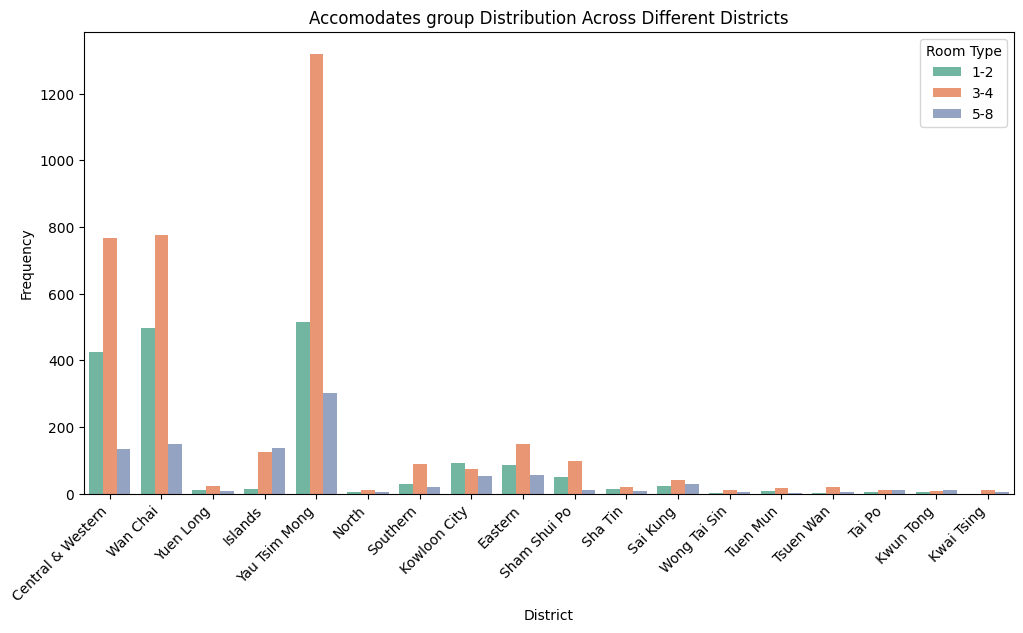

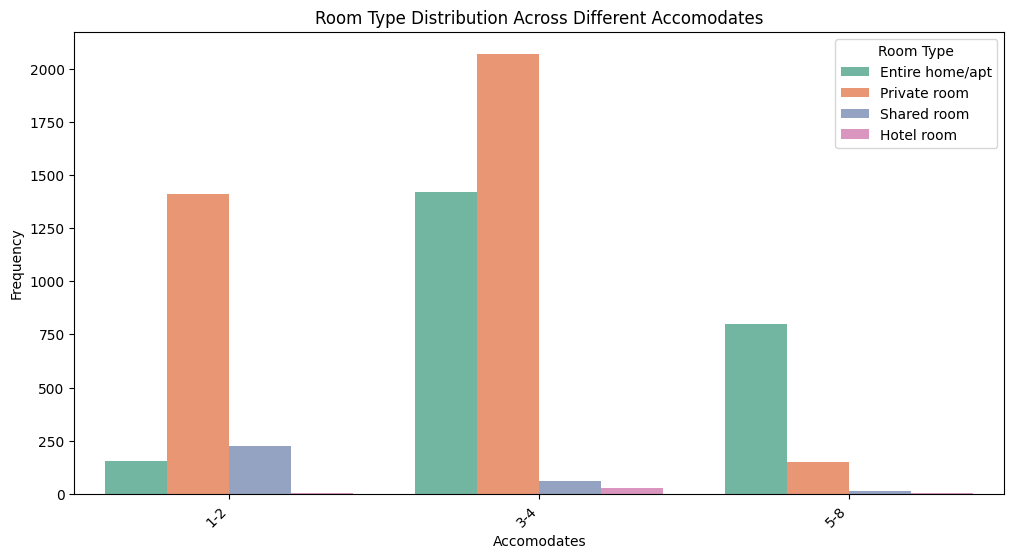

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\17284945.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 0.1670
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\17284945.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\17284945.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [20]:
# df_HongKong.to_csv("output_dataframe.csv", index=False)

# Set figure size for better readability

df_HongKong['Accommodates Group'] = pd.cut(df_HongKong['accommodates'], 
                                           bins=[1, 2, 4, 8], 
                                           labels=['1-2', '3-4', '5-8'], 
                                           right=False)

plt.figure(figsize=(12, 6))

# Use countplot to visualize room type frequencies across districts
sns.countplot(data=df_HongKong, 
              x='neighbourhood_cleansed', 
              hue='Accommodates Group', 
              palette='Set2')

# Add labels and title
plt.title('Accomodates group Distribution Across Different Districts')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability
plt.legend(title='Room Type')

# Show the plot
plt.show()

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Use countplot to visualize room type frequencies across districts
sns.countplot(data=df_HongKong, 
              x='Accommodates Group', 
              hue='room_type', 
              palette='Set2')

# Add labels and title
plt.title('Room Type Distribution Across Different Accomodates')
plt.xlabel('Accomodates')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability
plt.legend(title='Room Type')

# Show the plot
plt.show()

df_filter = df_HongKong[(df_HongKong['room_type'] == 'Private room') & (df_HongKong['accommodates'] > 2) & (df_HongKong['bedrooms'] == 1) & (df_HongKong['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 0.1670

df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Hong Kong Disneyland", "Tian Tan Buddha", "Ngong Ping 360", "Ocean Park", 
        "Nan Lian Garden", "Sky100", "Hong Kong Space Museum", 
        "Temple Street Night Market", "Hong Kong Zoological and Botanical Gardens", 
        "Man Mo Temple"
    ],
    "Latitude": [
        "22.3130° N", "22.2540° N", "22.2563° N", "22.2467° N", 
        "22.3396° N", "22.3034° N", "22.2943° N", 
        "22.3065° N", "22.2768° N", "22.2840° N"
    ],
    "Longitude": [
        "114.0413° E", "113.9050° E", "113.9014° E", "114.1757° E", 
        "114.2045° E", "114.1603° E", "114.1719° E", 
        "114.1700° E", "114.1560° E", "114.1502° E"
    ],
    "District": [
        "Islands", "Islands", "Islands", "Southern", 
        "Kowloon City", "Yau Tsim Mong", "Yau Tsim Mong", 
        "Yau Tsim Mong", "Central & Western", "Central & Western"
    ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    # matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    # if not matching_attractions.empty:
        # Loop through all attractions in the same district
    for _, attraction in df_attraction.iterrows():
        # Calculate the distance between hotel and attraction
        distance = haversine(
            hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
            attraction['Latitude_decimal'], attraction['Longitude_decimal']
        )
        hotel_distances.append(distance)
        hotel_attractions.append(attraction["Attractions"])  # Store attraction name
        
    distances.append(hotel_distances)
    attraction_names.append(hotel_attractions)
    # else:
    #     distances.append(np.nan)  # If no attraction found in the same district
    #     attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)



C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


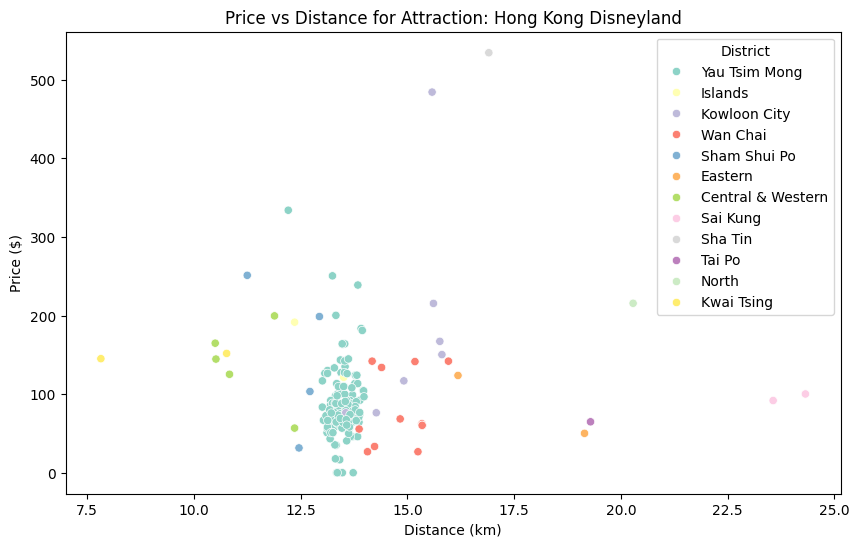

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


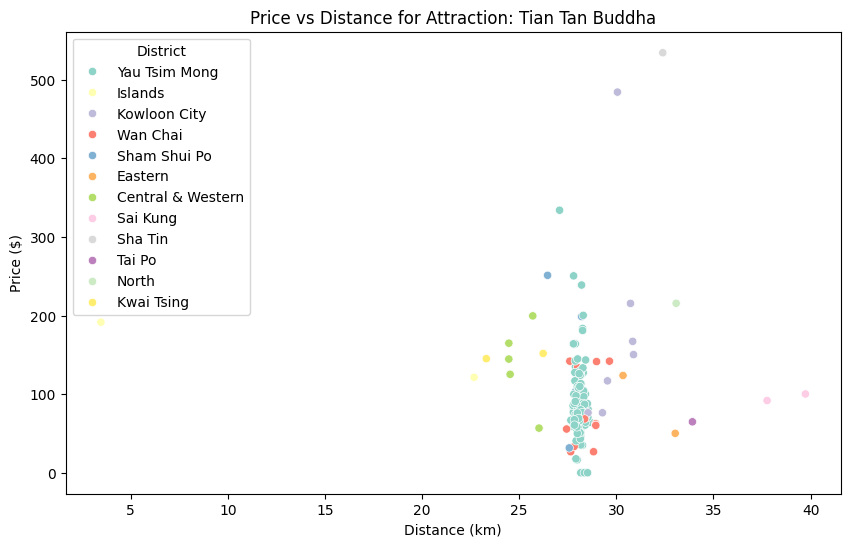

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


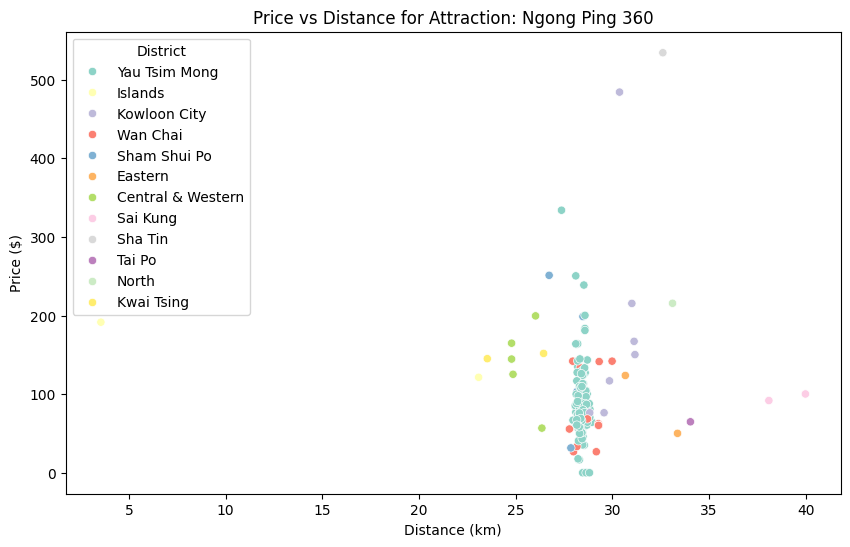

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


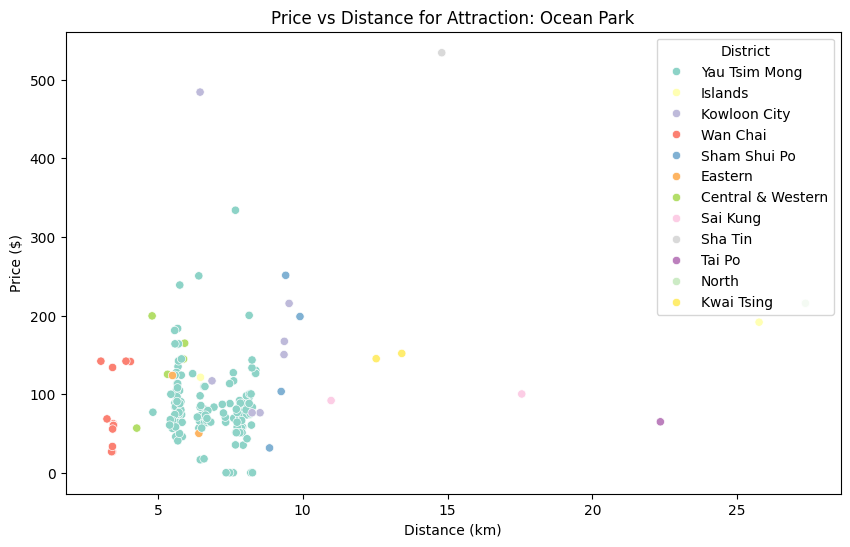

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


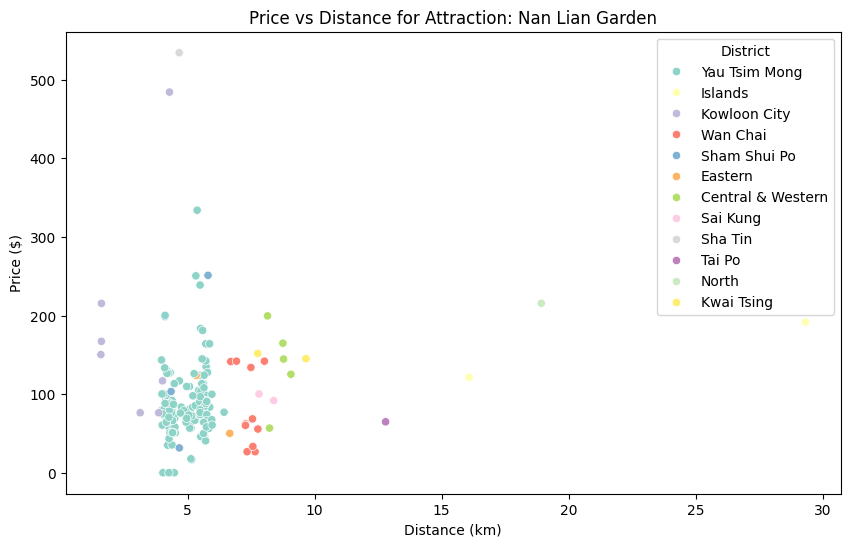

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


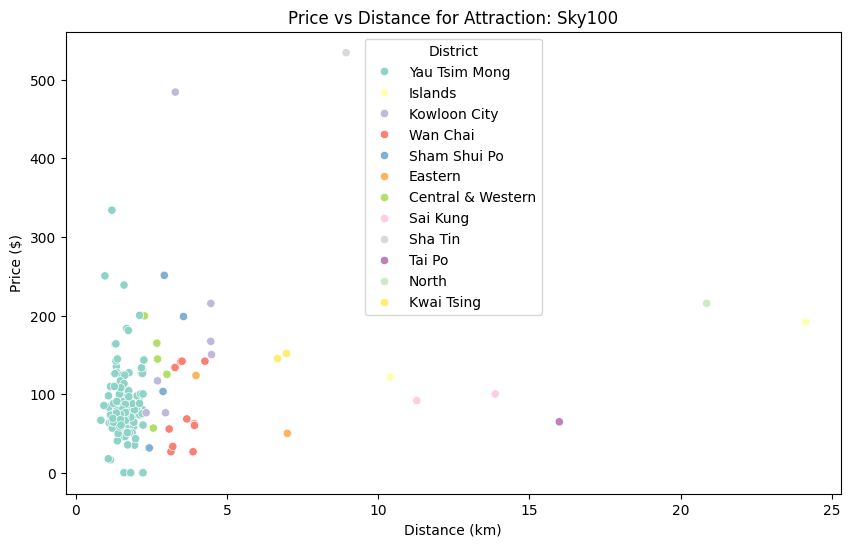

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


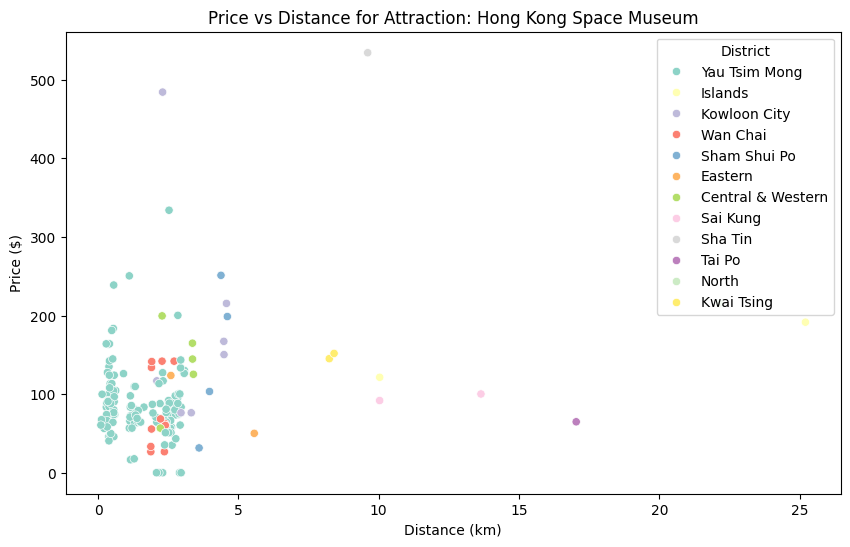

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


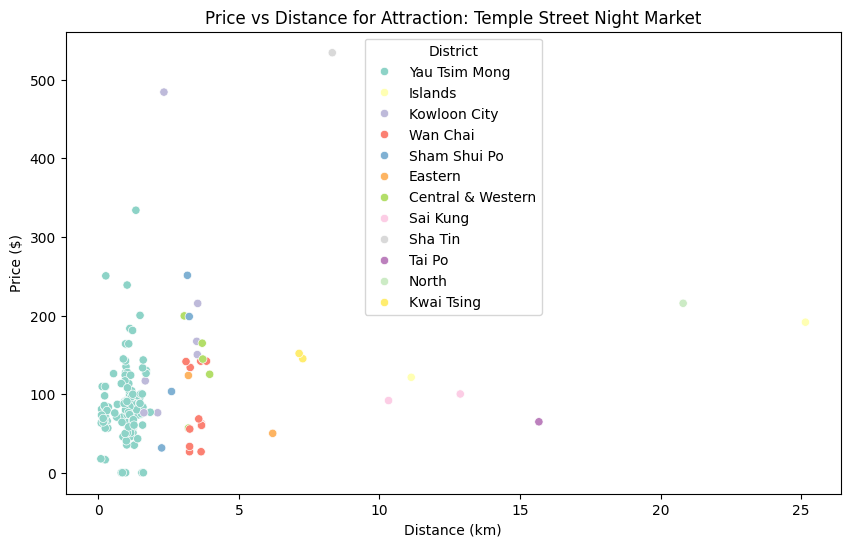

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


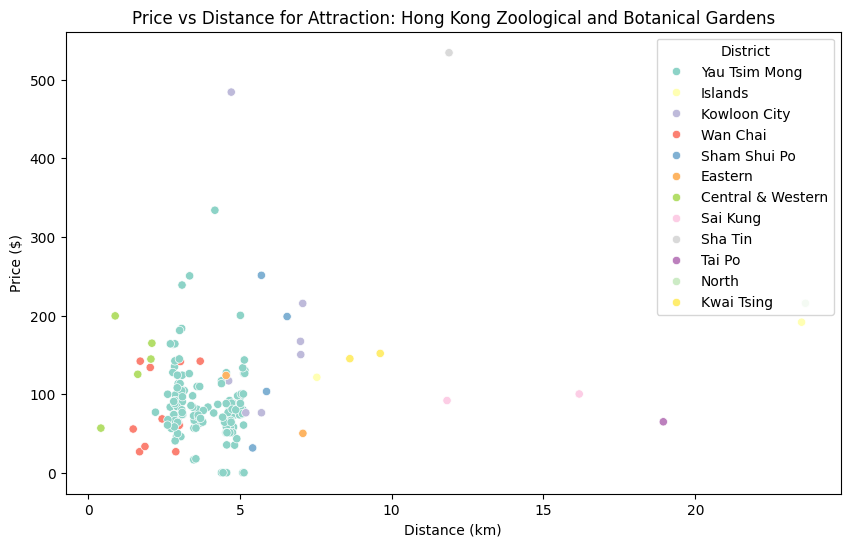

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\4286408574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])


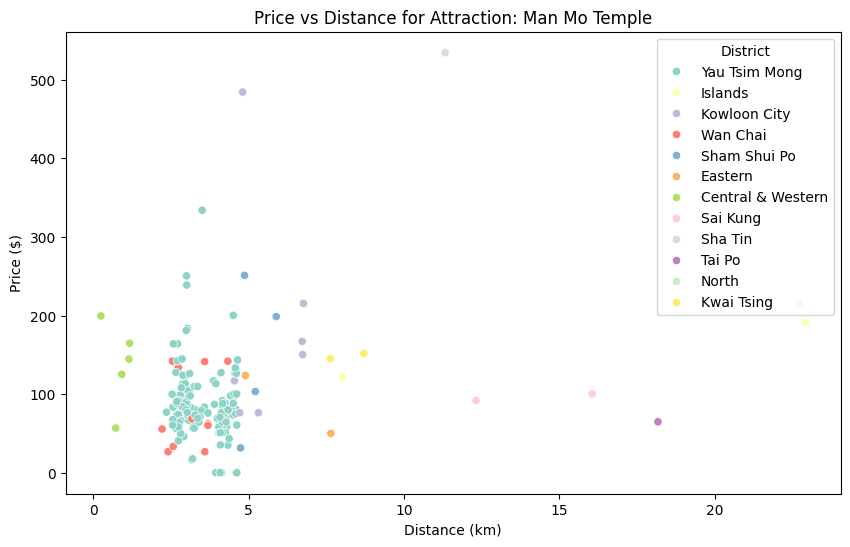

In [21]:
ls = ['Hong Kong Disneyland', 'Tian Tan Buddha', 'Ngong Ping 360', 'Ocean Park', 'Nan Lian Garden', 'Sky100', 'Hong Kong Space Museum', 'Temple Street Night Market', 'Hong Kong Zoological and Botanical Gardens', 'Man Mo Temple']
for i in range(10):
    # Create a new column for the i-th distance to attraction
    df_filter[f"Avg_Distance_to_Attraction_{i}_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: x[i])
    
    # Filter rows with non-null prices and the newly created distance column
    df_filtered_for_plot = df_filter.dropna(subset=["price", f"Avg_Distance_to_Attraction_{i}_km"])
    
    # Extract the attraction's name (the first non-null value in the filtered dataframe for this attraction)
    attraction_name = df_filtered_for_plot['Attractions_in_District'].apply(lambda x: x[i] if i < len(x) else 'Unknown Attraction').iloc[0]

    plt.figure(figsize=(10, 6))
    
    # Plot with hue as the neighbourhood and add a unique title for each attraction
    sns.scatterplot(data=df_filtered_for_plot, 
                    x=f'Avg_Distance_to_Attraction_{i}_km', 
                    y='price', 
                    hue='neighbourhood_cleansed', 
                    palette='Set3')

    # Add labels and a unique title with the attraction name
    plt.title(f'Price vs Distance for Attraction: {ls[i]}')
    plt.xlabel('Distance (km)')
    plt.ylabel('Price ($)')
    plt.legend(title='District')

    # Show the plot for each attraction
    plt.show()


# df_filtered_for_plot_Yau_Tsim_Mong = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Yau Tsim Mong']

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_filtered_for_plot_Yau_Tsim_Mong["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Yau_Tsim_Mong["price"], alpha=0.7, color='g')

# # Set plot labels and title
# plt.title("Price vs. Average Distance to Attraction for District = Yau Tsim Mong", fontsize=16)
# plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
# plt.ylabel("Price (in SGD)", fontsize=12)

# # Display the plot
# plt.show()

# df_filtered_for_plot_Islands = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Islands']

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_filtered_for_plot_Islands["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Islands["price"], alpha=0.7, color='g')

# # Set plot labels and title
# plt.title("Price vs. Average Distance to Attraction for District = Island", fontsize=16)
# plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
# plt.ylabel("Price (in SGD)", fontsize=12)

# # Display the plot
# plt.show()

# df_filtered_for_plot_Southern = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Southern']

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_filtered_for_plot_Southern["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Southern["price"], alpha=0.7, color='g')

# # Set plot labels and title
# plt.title("Price vs. Average Distance to Attraction for District = Southern", fontsize=16)
# plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
# plt.ylabel("Price (in SGD)", fontsize=12)

# # Display the plot
# plt.show()

# df_filtered_for_plot_Kowloon_City  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Kowloon City']

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_filtered_for_plot_Kowloon_City["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Kowloon_City["price"], alpha=0.7, color='g')

# # Set plot labels and title
# plt.title("Price vs. Average Distance to Attraction for District = Kowloon City", fontsize=16)
# plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
# plt.ylabel("Price (in SGD)", fontsize=12)

# # Display the plot
# plt.show()

# df_filtered_for_plot_Central_Western   = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Central & Western']

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df_filtered_for_plot_Central_Western["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Central_Western["price"], alpha=0.7, color='g')

# # Set plot labels and title
# plt.title("Price vs. Average Distance to Attraction for District = Central & Western", fontsize=16)
# plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
# plt.ylabel("Price (in SGD)", fontsize=12)

# # Display the plot
# plt.show()

New York Analysis

In [22]:
df_NewYork.to_csv("output_dataframe.csv", index=False)

df_filter = df_NewYork[(df_NewYork['room_type'] == 'Private room') & (df_NewYork['accommodates'] > 2) & (df_NewYork['bedrooms'] == 1) & (df_NewYork['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 1.36

df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Central Park", "The Metropolitan Museum of Art", "Times Square", 
            "American Museum of Natural History", "Empire State Building", 
            "St. Patrick's Cathedral", "Top of the Rock", "Grand Central Terminal", 
            "Statue of Liberty", "Brooklyn Bridge"
        ],
        "Latitude": [
            "40.7826° N", "40.7794° N", "40.7575° N", 
            "40.7813° N", "40.7484° N", "40.7586° N", 
            "40.7593° N", "40.7534° N", "40.6892° N", 
            "40.7061° N"
        ],
        "Longitude": [
            "73.9656° W", "73.9632° W", "73.9858° W", 
            "73.9740° W", "73.9857° W", "73.9762° W", 
            "73.9794° W", "73.9768° W", "74.0445° W", 
            "73.9969° W"
        ],
        "District": [
            "Upper West Side", "Upper East Side", "Theater District", 
            "Upper West Side", "Midtown", "Midtown", 
            "Midtown", "Murray Hill", "Financial District", 
            "Civic Center"
        ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    if not matching_attractions.empty:
        # Loop through all attractions in the same district
        for _, attraction in matching_attractions.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])  # Store attraction name
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)
    else:
        distances.append(np.nan)  # If no attraction found in the same district
        attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)



C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\650490708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 1.36
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\650490708.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\650490708.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\1666384495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))


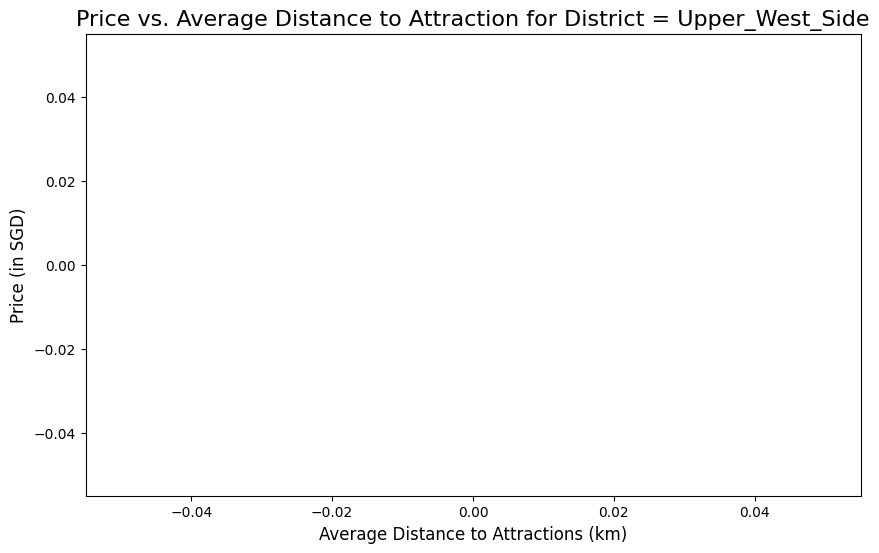

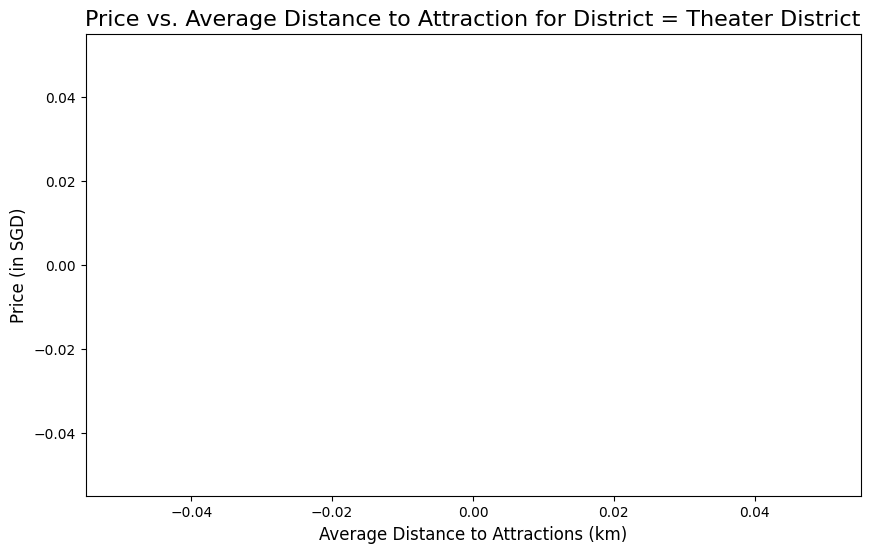

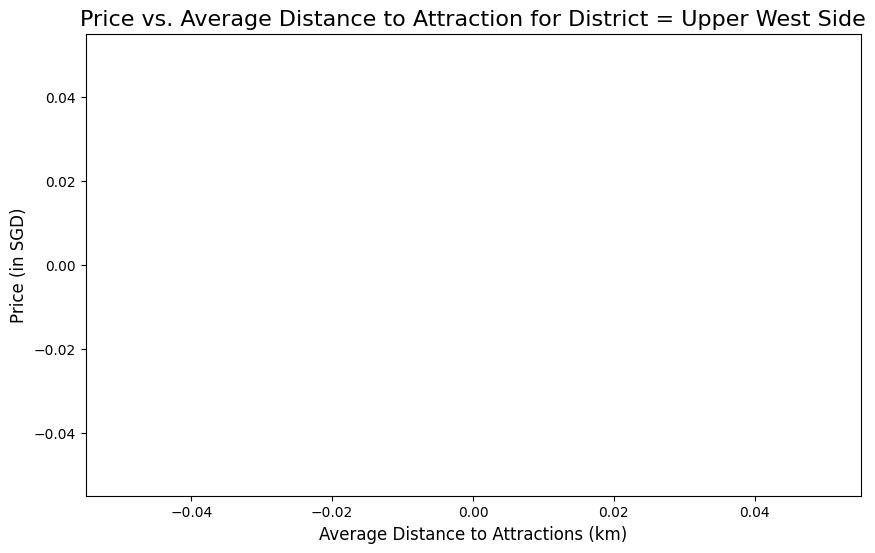

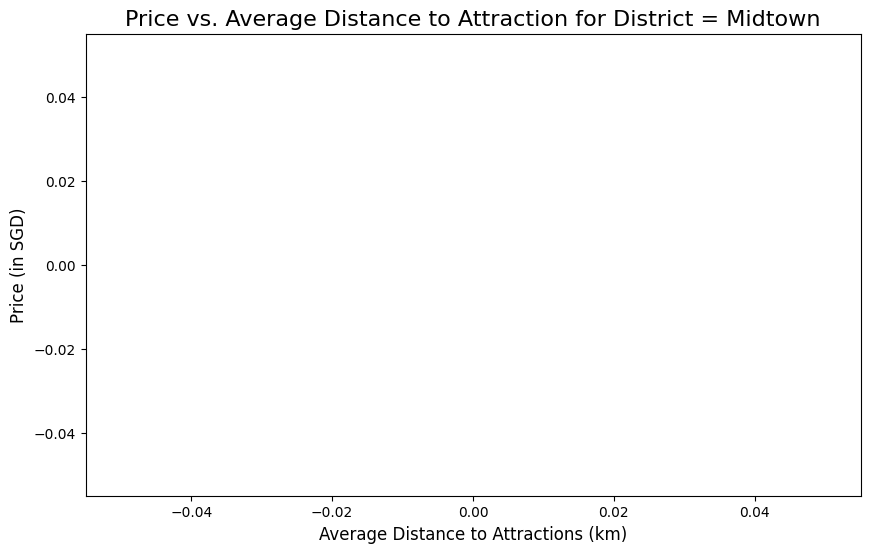

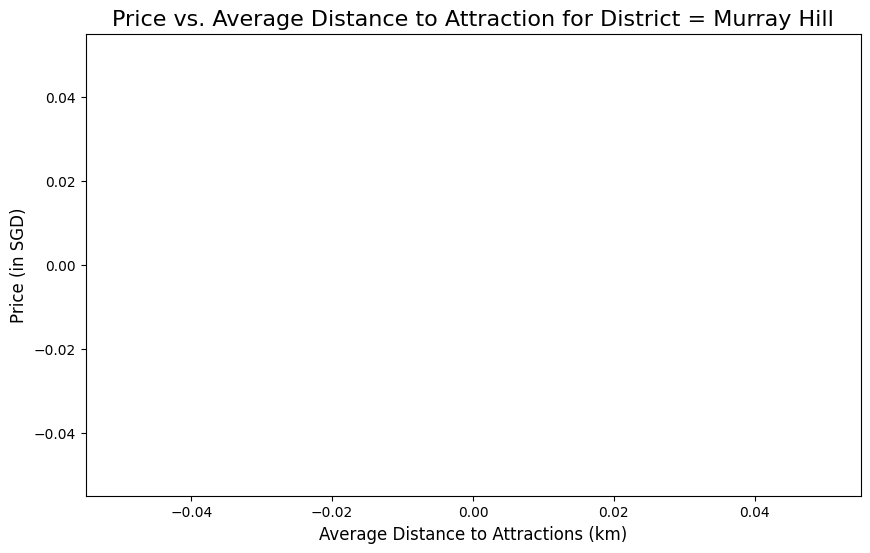

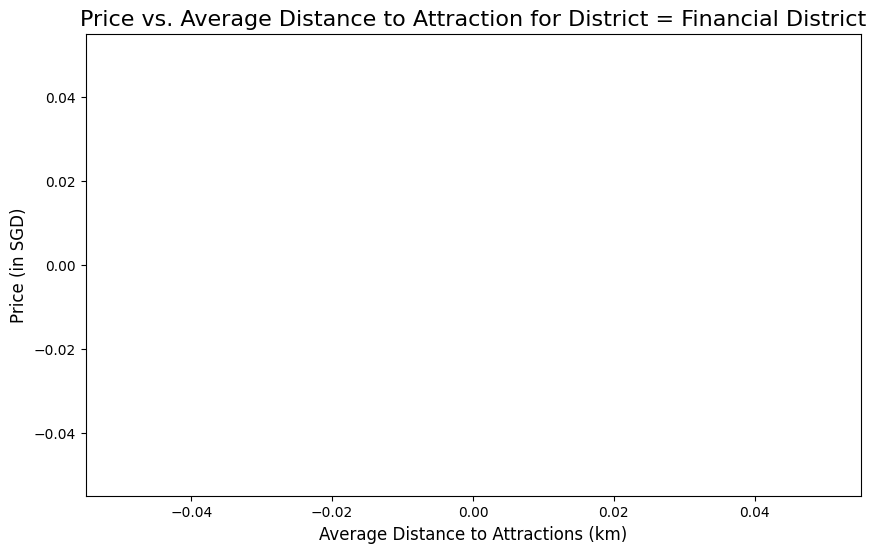

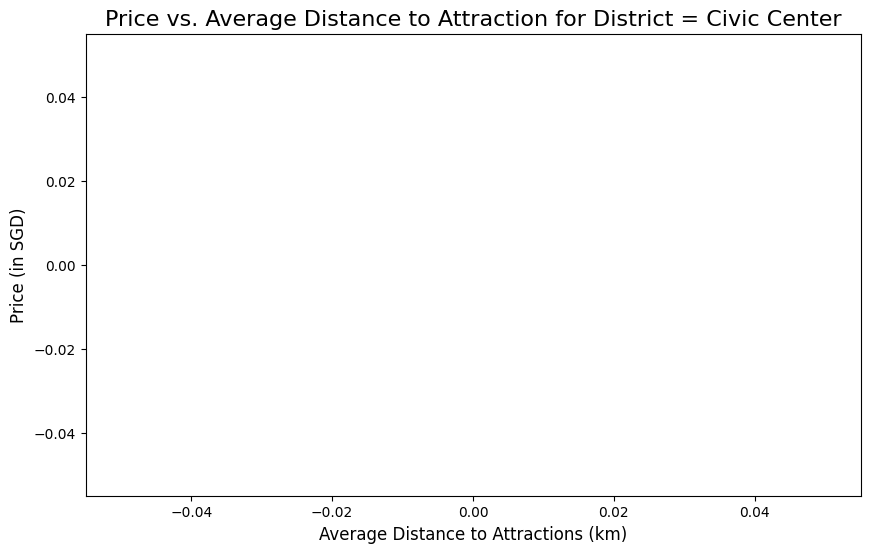

In [23]:
df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))

# Drop rows where either price or average distance is NaN
df_filtered_for_plot = df_filter.dropna(subset=["price", "Avg_Distance_to_Attraction_km"])

df_filtered_for_plot_Upper_West_Side = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Upper West Side']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Upper_West_Side["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Upper_West_Side["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Upper_West_Side", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Theater_District = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Theater District']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Theater_District["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Theater_District["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Theater District", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Upper_West_Side = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Upper West Side']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Upper_West_Side["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Upper_West_Side["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Upper West Side", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Midtown  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Midtown']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Midtown["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Midtown["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Midtown", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Murray_Hill  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Murray Hill']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Murray_Hill["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Murray_Hill["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Murray Hill", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Financial_District  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Financial District']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Financial_District["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Financial_District["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Financial District", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Civic_Center  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Civic Center']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Civic_Center["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Civic_Center["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Civic Center", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

Mexico City Analysis

In [24]:
# df_HongKong.to_csv("output_dataframe.csv", index=False)

df_filter = df_Mexico_City[(df_Mexico_City['room_type'] == 'Private room') & (df_Mexico_City['accommodates'] > 2) & (df_Mexico_City['bedrooms'] == 1) & (df_Mexico_City['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 0.076

df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Museo Nacional de Antropologia", "Chapultepec Castle", "Constitution Plaza", 
            "Museo del Templo Mayor", "Catedral Metropolitana", "National Art Museum", 
            "Palacio de Bellas Artes", "Museo Frida Kahlo", "Six Flags México", 
            "Basilica de Santa Maria de Guadalupe"
        ],
        "Latitude": [
            "19.4260° N", "19.4204° N", "19.4326° N", 
            "19.4346° N", "19.4344° N", "19.4362° N", 
            "19.4352° N", "19.3552° N", "19.2956° N", 
            "19.4848° N"
        ],
        "Longitude": [
            "99.1863° W", "99.1819° W", "99.1333° W", 
            "99.1319° W", "99.1331° W", "99.1394° W", 
            "99.1412° W", "99.1625° W", "99.2106° W", 
            "99.1179° W"
        ],
        "District": [
            "Miguel Hidalgo", "Miguel Hidalgo", "Cuauhtemoc", 
            "Cuauhtemoc", "Cuauhtemoc", "Cuauhtemoc", 
            "Cuauhtemoc", "Coyoacan", "Tlalpan", 
            "Gustavo A. Madero"
        ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    if not matching_attractions.empty:
        # Loop through all attractions in the same district
        for _, attraction in matching_attractions.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])  # Store attraction name
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)
    else:
        distances.append(np.nan)  # If no attraction found in the same district
        attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)



C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2294960061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 0.076
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2294960061.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2294960061.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\3954034353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))


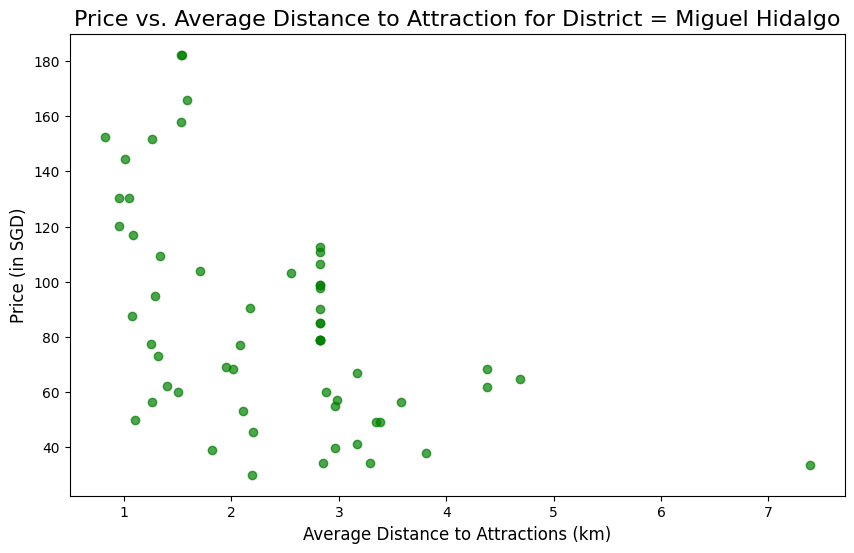

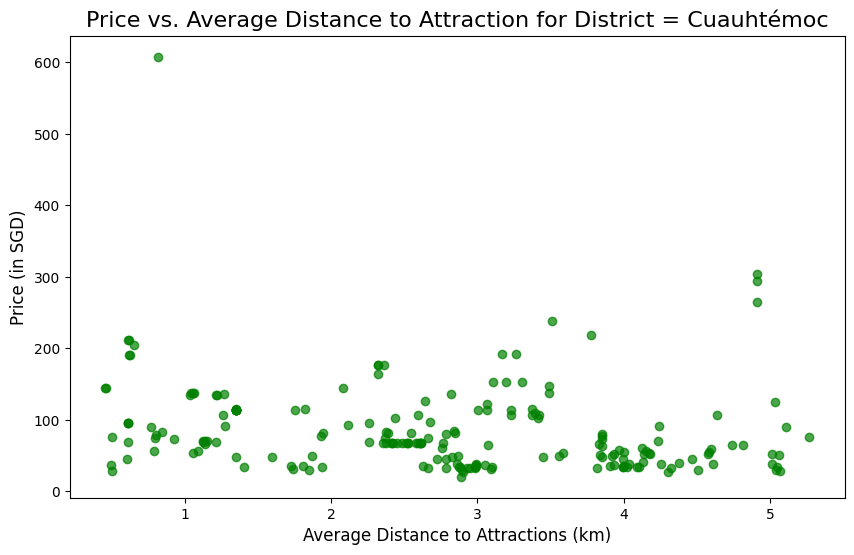

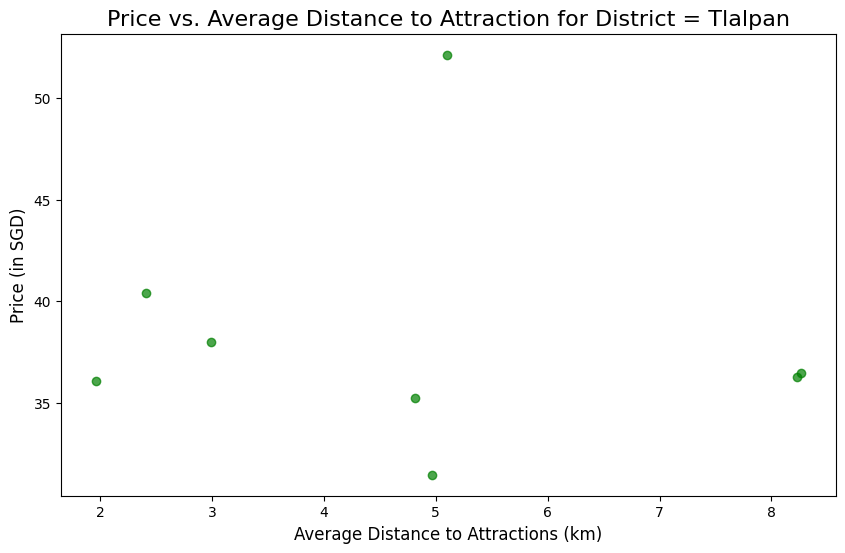

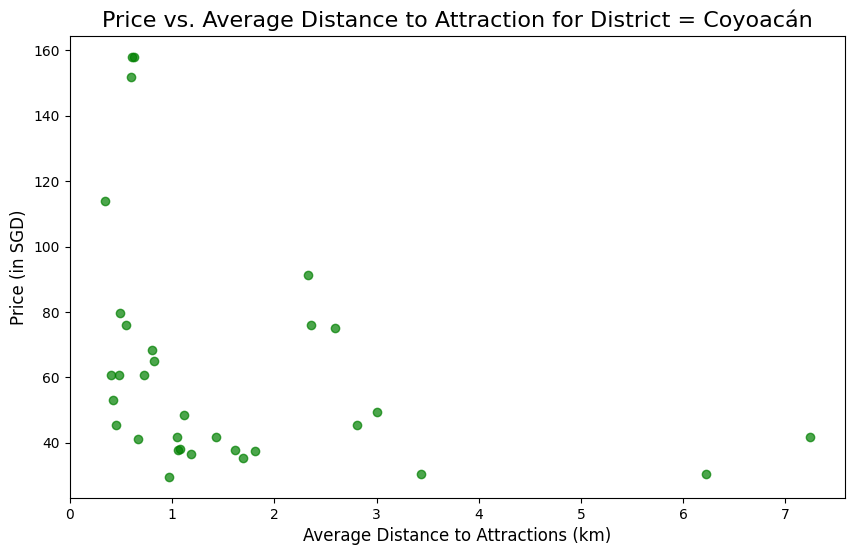

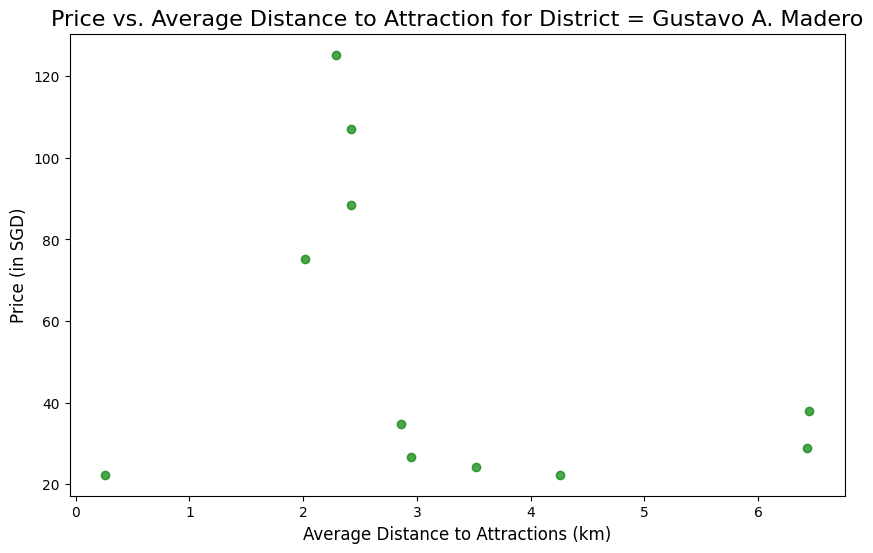

In [25]:
df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))

# Drop rows where either price or average distance is NaN
df_filtered_for_plot = df_filter.dropna(subset=["price", "Avg_Distance_to_Attraction_km"])

df_filtered_for_plot_Miguel_Hidalgo = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Miguel Hidalgo']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Miguel_Hidalgo["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Miguel_Hidalgo["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Miguel Hidalgo", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Cuauhtémoc = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Cuauhtemoc']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Cuauhtémoc["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Cuauhtémoc["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Cuauhtémoc", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Tlalpan = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Tlalpan']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Tlalpan["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Tlalpan["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Tlalpan", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Coyoacán  = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Coyoacan']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Coyoacán["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Coyoacán["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Coyoacán", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_GustavoAMadero   = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Gustavo A. Madero']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_GustavoAMadero["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_GustavoAMadero["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Gustavo A. Madero", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()


Paris Analysis

In [26]:
# df_HongKong.to_csv("output_dataframe.csv", index=False)

df_filter = df_Paris[(df_Paris['room_type'] == 'Private room') & (df_Paris['accommodates'] > 2) & (df_Paris['bedrooms'] == 1) & (df_Paris['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 1.62

df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Louvre Museum", "Eiffel Tower", "Arc de Triomphe", 
            "Cathédrale Notre-Dame de Paris", "Musée d'Orsay", 
            "Sainte-Chapelle", "The Centre Pompidou", "Tuileries Garden", 
            "Basilique du Sacré-Cœur de Montmartre", "Catacombs of Paris"
        ],
        "Latitude": [
            "48.8606° N", "48.8584° N", "48.8738° N", 
            "48.8530° N", "48.8600° N", "48.8554° N", 
            "48.8606° N", "48.8635° N", "48.8867° N", 
            "48.8338° N"
        ],
        "Longitude": [
            "2.3376° E", "2.2945° E", "2.2950° E", 
            "2.3499° E", "2.3266° E", "2.3450° E", 
            "2.3522° E", "2.3275° E", "2.3431° E", 
            "2.3324° E"
        ],
        "District": [
            "Louvre", "Passy", "Batignolles-Monceau", 
            "Pantheon", "Palais-Bourbon", "Pantheon", 
            "Temple", "Louvre", "Buttes-Montmartre", 
            "Observatoire"
        ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    if not matching_attractions.empty:
        # Loop through all attractions in the same district
        for _, attraction in matching_attractions.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])  # Store attraction name
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)
    else:
        distances.append(np.nan)  # If no attraction found in the same district
        attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)



C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\416248335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 1.62
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\416248335.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\416248335.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\1062476192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))


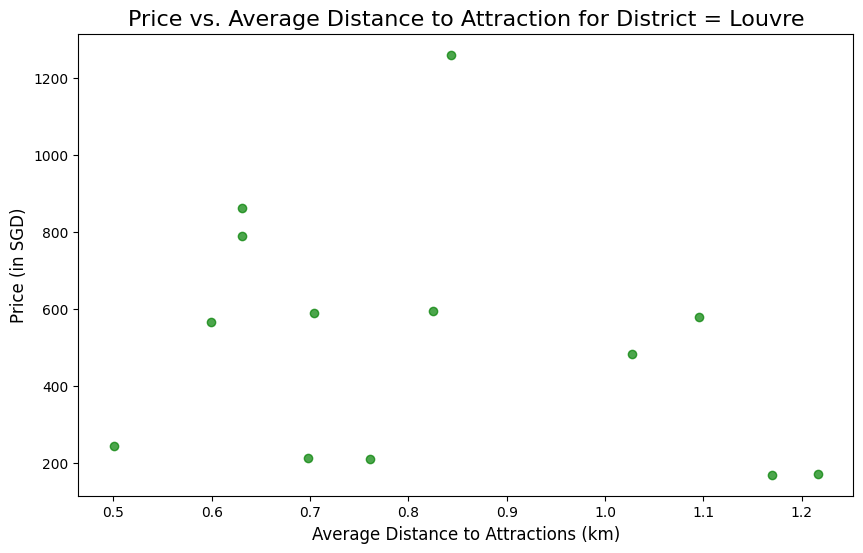

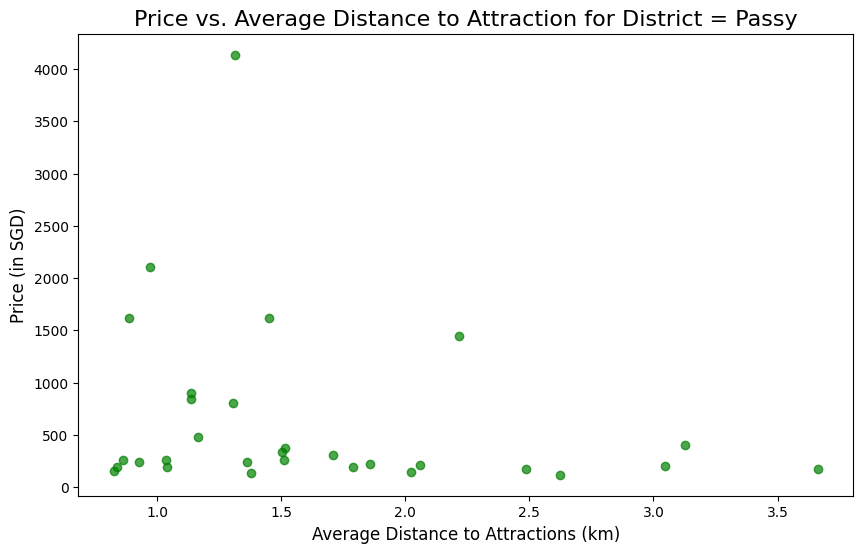

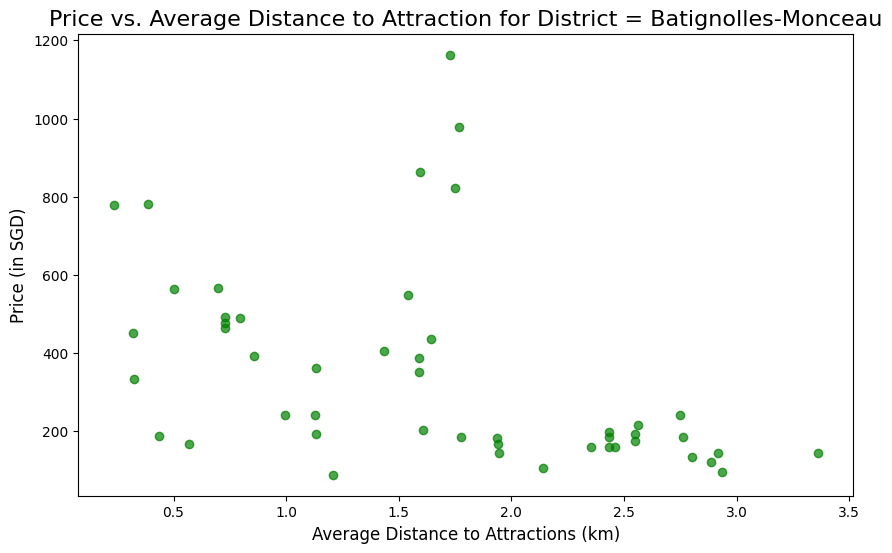

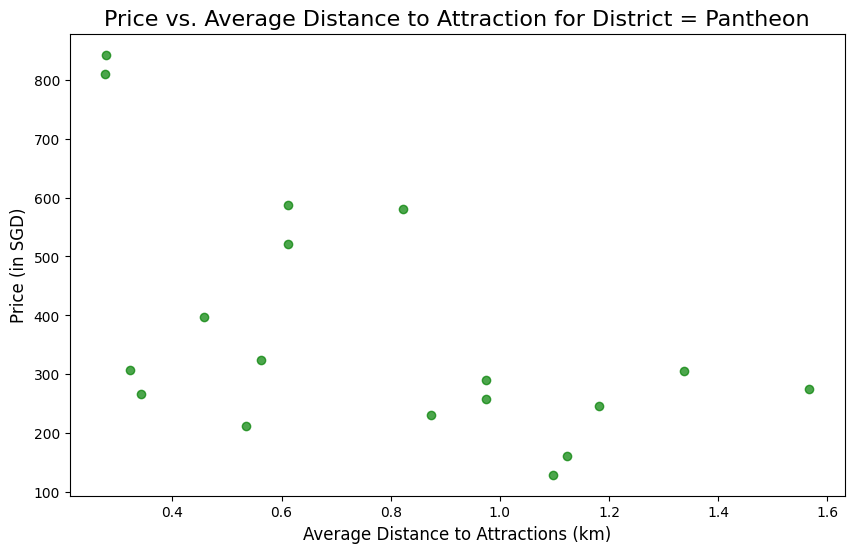

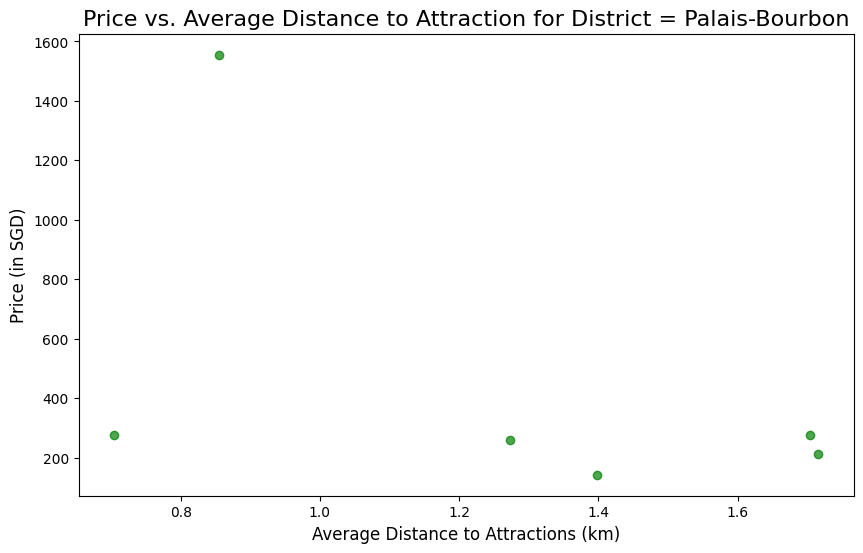

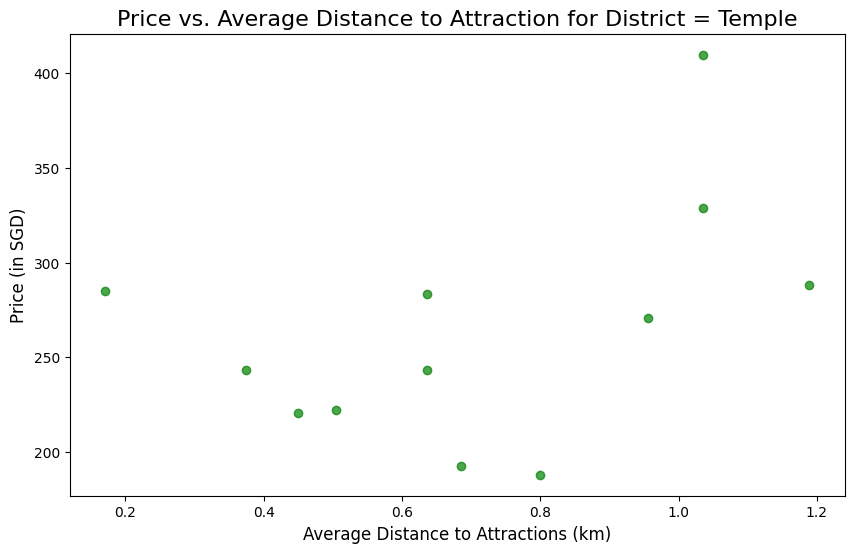

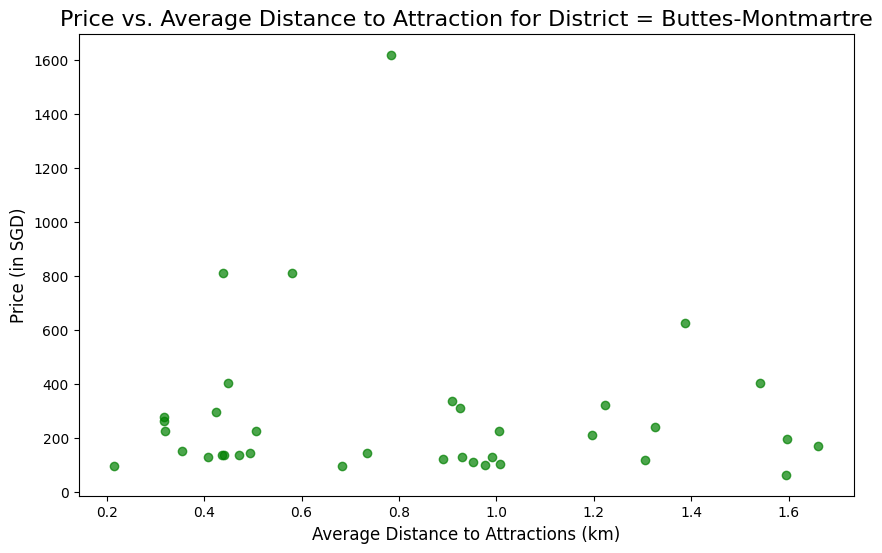

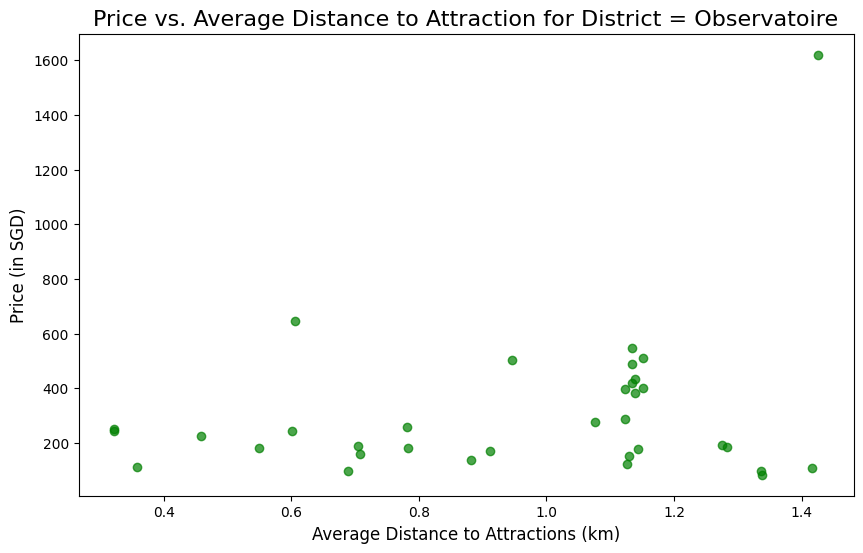

In [27]:
df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))

# Drop rows where either price or average distance is NaN
df_filtered_for_plot = df_filter.dropna(subset=["price", "Avg_Distance_to_Attraction_km"])

df_filtered_for_plot_Louvre = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Louvre']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Louvre["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Louvre["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Louvre", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Passy = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Passy']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Passy["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Passy["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Passy", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Batignolles_Monceau = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Batignolles-Monceau']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Batignolles_Monceau["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Batignolles_Monceau["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Batignolles-Monceau", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Panthéon = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Pantheon']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Panthéon["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Panthéon["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Pantheon", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Palais_Bourbon   = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Palais-Bourbon']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Palais_Bourbon["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Palais_Bourbon["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Palais-Bourbon", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Temple = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Temple']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Temple["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Temple["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Temple", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Buttes_Montmartr = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Buttes-Montmartre']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Buttes_Montmartr["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Buttes_Montmartr["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Buttes-Montmartre", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Observatoire = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Observatoire']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Observatoire["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Observatoire["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Observatoire", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()


Rio De Janeiro Analysis

In [28]:
# df_HongKong.to_csv("output_dataframe.csv", index=False)

df_filter = df_Rio[(df_Rio['room_type'] == 'Private room') & (df_Rio['accommodates'] > 2) & (df_Rio['bedrooms'] == 1) & (df_Rio['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 0.276

df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Museu do Amanhã", "Botanical Garden of Rio de Janeiro", "Escadaria Selarón", 
            "AquaRio", "Municipal Theater of Rio de Janeiro", 
            "Catedral Metropolitana de São Sebastião do Rio de Janeiro", "Christ the Redeemer", 
            "Ipanema Beach", "Arpoador", "Sugarloaf Mountain"
        ],
        "Latitude": [
            "22.8946° S", "22.9705° S", "22.9153° S", 
            "22.8933° S", "22.9090° S", "22.9107° S", 
            "22.9519° S", "22.9871° S", "22.9886° S", 
            "22.9493° S"
        ],
        "Longitude": [
            "43.1796° W", "43.2234° W", "43.1792° W", 
            "43.1922° W", "43.1766° W", "43.1808° W", 
            "43.2105° W", "43.2048° W", "43.1930° W", 
            "43.1546° W"
        ],
        "District": [
            "Santo Cristo", "Jardim Botanico", "Santa Teresa", 
            "Gamboa", "Centro", "Centro", 
            "Cosme Velho", "Ipanema", "Ipanema", 
            "Urca"
        ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    if not matching_attractions.empty:
        # Loop through all attractions in the same district
        for _, attraction in matching_attractions.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])  # Store attraction name
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)
    else:
        distances.append(np.nan)  # If no attraction found in the same district
        attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)



C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2194704448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 0.276
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2194704448.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2194704448.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\1928237169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))


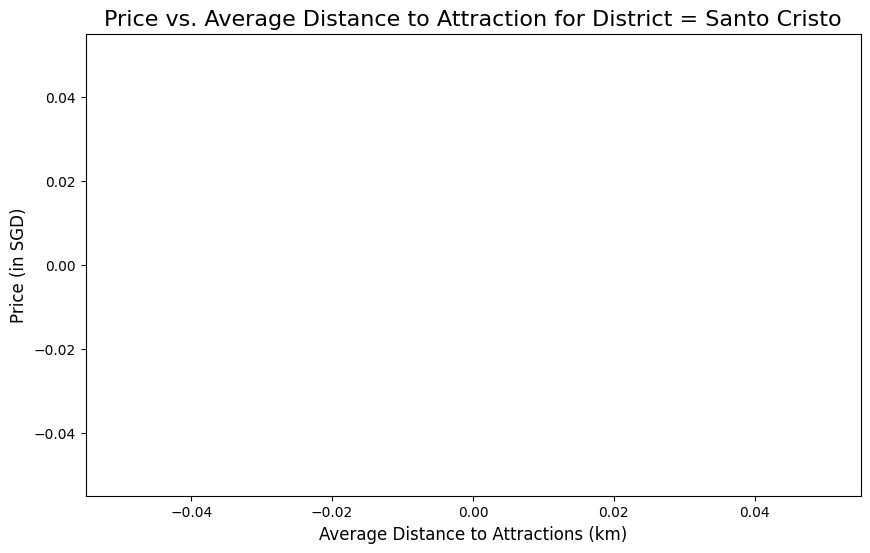

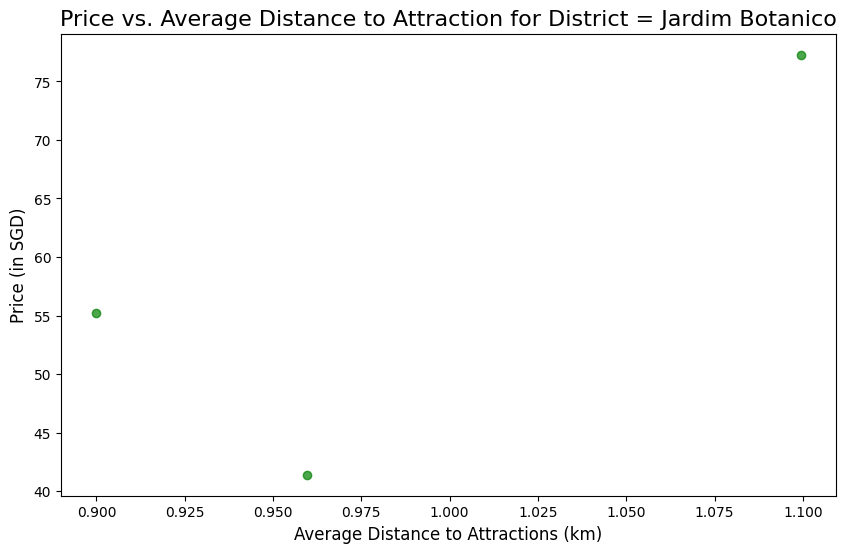

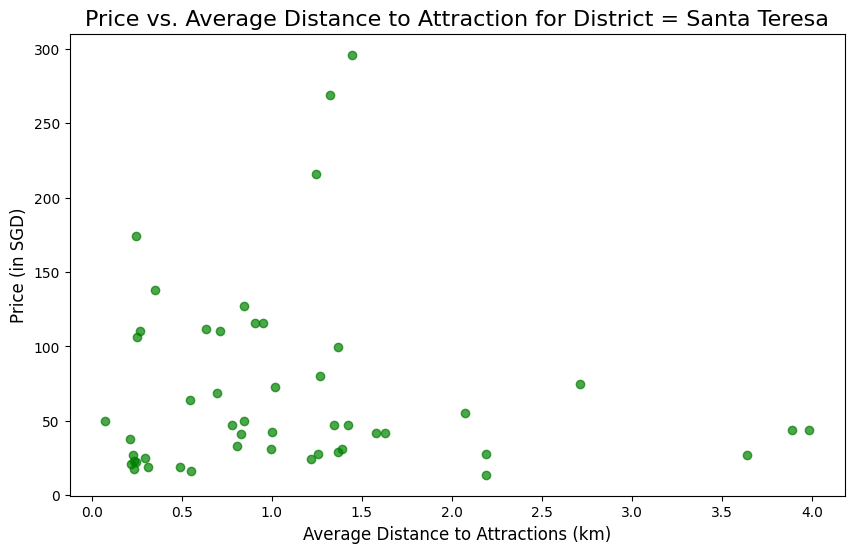

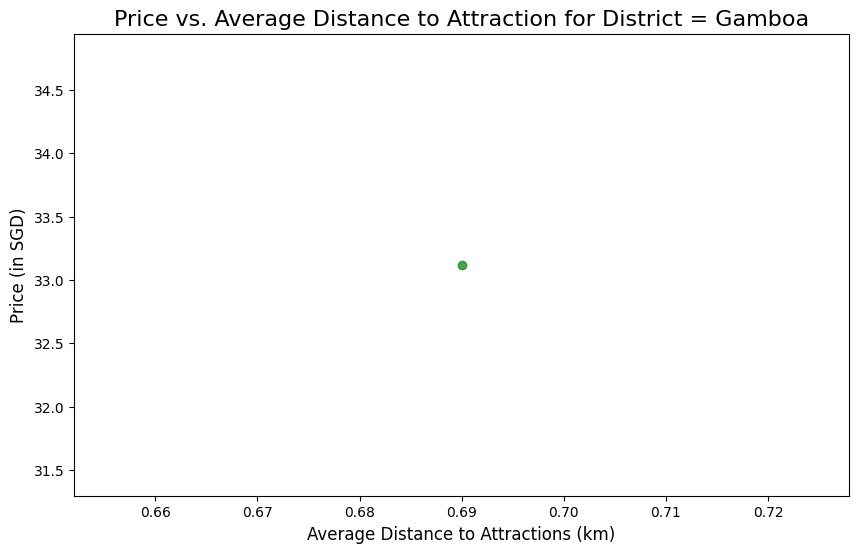

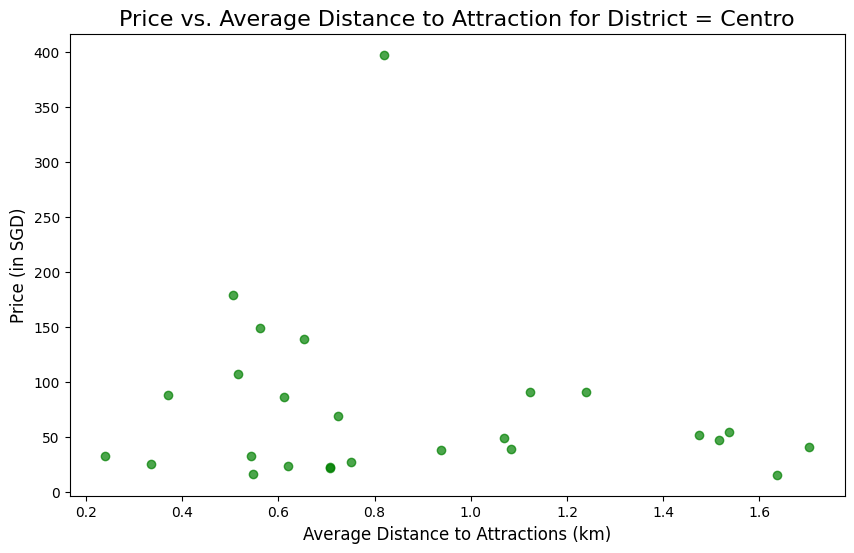

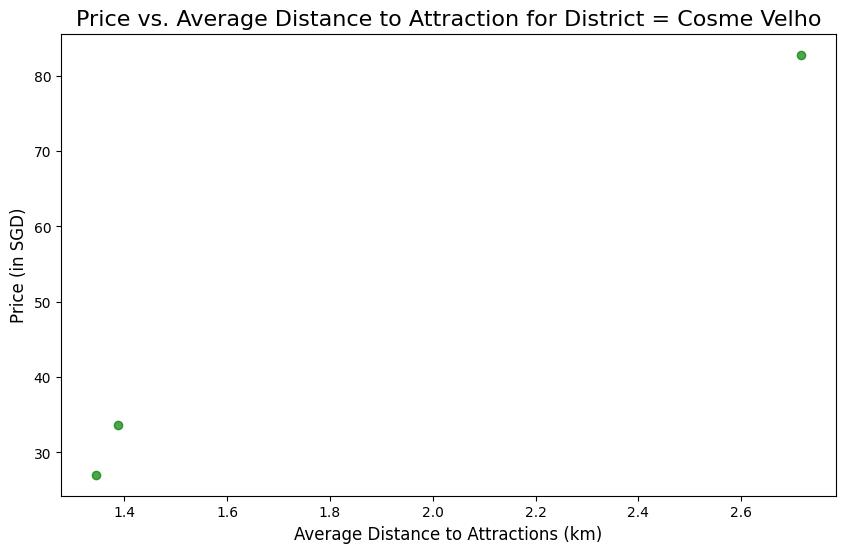

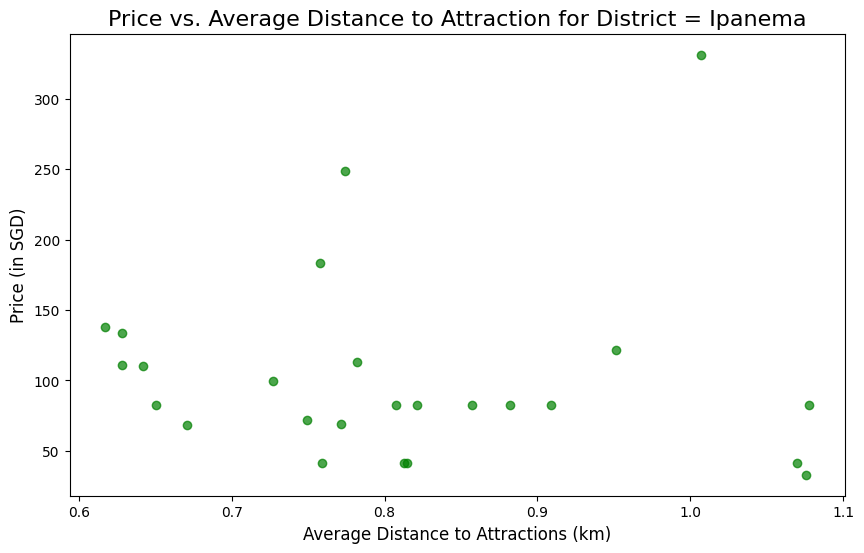

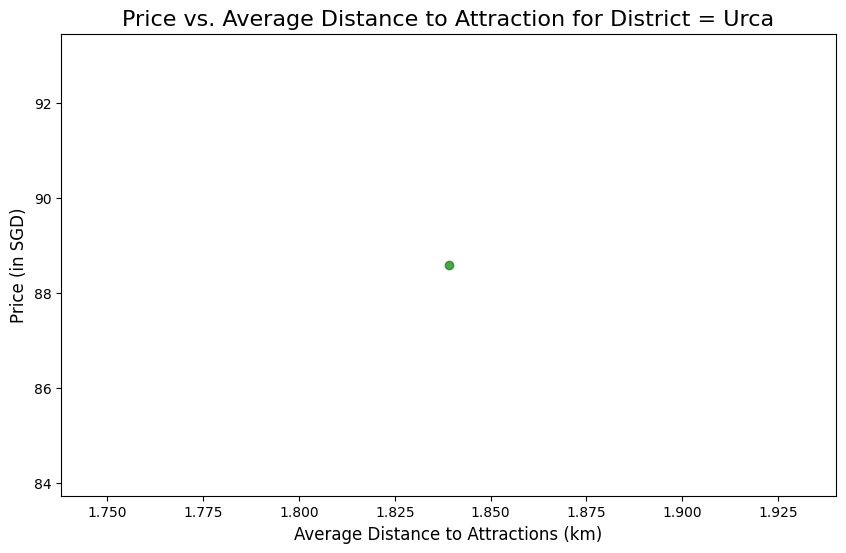

In [29]:
df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))

# Drop rows where either price or average distance is NaN
df_filtered_for_plot = df_filter.dropna(subset=["price", "Avg_Distance_to_Attraction_km"])

df_filtered_for_plot_Santo_Cristo = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Santo Cristo']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Santo_Cristo["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Santo_Cristo["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Santo Cristo", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Jardim_Botanico = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Jardim Botanico']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Jardim_Botanico["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Jardim_Botanico["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Jardim Botanico", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Batignolles_Santa_Teresa = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Santa Teresa']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Batignolles_Santa_Teresa["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Batignolles_Santa_Teresa["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Santa Teresa", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Gamboa = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Gamboa']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Gamboa["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Gamboa["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Gamboa", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Palais_Centro = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Centro']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Palais_Centro["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Palais_Centro["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Centro", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Cosme_Velho = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Cosme Velho']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Cosme_Velho["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Cosme_Velho["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Cosme Velho", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Ipanema = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Ipanema']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Ipanema["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Ipanema["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Ipanema", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Urca = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Urca']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Urca["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Urca["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Urca", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()


Tokyo Analysis

In [30]:
# df_HongKong.to_csv("output_dataframe.csv", index=False)

df_filter = df_Tokyo[(df_Tokyo['room_type'] == 'Private room') & (df_Tokyo['accommodates'] > 2) & (df_Tokyo['bedrooms'] == 1) & (df_Tokyo['bathrooms'] == 1)]


df_filter["price"] = df_filter["price"] * 0.0088

df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Sensoji Temple (Asakusa)", "Ueno Zoo", "Ginza", 
            "Tsukiji Market", "Hamarikyu Gardens", "Shibuya Crossing", 
            "Shinjuku Gyoen National Gardens", "Meiji Shrine", 
            "Tokyo Skytree", "Ryogoku Kokugikan"
        ],
        "Latitude": [
            "35.7148° N", "35.7175° N", "35.6712° N", 
            "35.6649° N", "35.6597° N", "35.6595° N", 
            "35.6852° N", "35.6764° N", "35.7101° N", 
            "35.6970° N"
        ],
        "Longitude": [
            "139.7967° E", "139.7714° E", "139.7665° E", 
            "139.7702° E", "139.7634° E", "139.7006° E", 
            "139.7101° E", "139.6993° E", "139.8107° E", 
            "139.7933° E"
        ],
        "District": [
            "Taito Ku", "Taito Ku", "Chuo Ku", 
            "Chuo Ku", "Chuo Ku", "Shibuya Ku", 
            "Shibuya Ku", "Shibuya Ku", "Sumida Ku", 
            "Sumida Ku"
        ]
}
)

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_filter["latitude"] = df["latitude"].astype(str)
df_filter["longitude"] = df["longitude"].astype(str)
df_filter["Latitude_decimal"] = df_filter["latitude"].apply(convert_to_decimal)
df_filter["Longitude_decimal"] = df_filter["longitude"].apply(convert_to_decimal)

distances = []
attraction_names = []

for idx, hotel in df_filter.iterrows():
    # Filter the attractions in the same district as the hotel
    matching_attractions = df_attraction[df_attraction['District'] == hotel['neighbourhood_cleansed']]
    
    hotel_distances = []
    hotel_attractions = []
    
    if not matching_attractions.empty:
        # Loop through all attractions in the same district
        for _, attraction in matching_attractions.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])  # Store attraction name
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)
    else:
        distances.append(np.nan)  # If no attraction found in the same district
        attraction_names.append(np.nan)

# Add distances and attractions as new columns in df_filter
df_filter["Distances_to_Attractions_km"] = distances
df_filter["Attractions_in_District"] = attraction_names

# Save the updated DataFrame to CSV
# df_filter.to_csv("output_dataframe.csv", index=False)

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2094195416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price"] = df_filter["price"] * 0.0088
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2094195416.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["latitude"] = df["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2094195416.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\1340773281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))


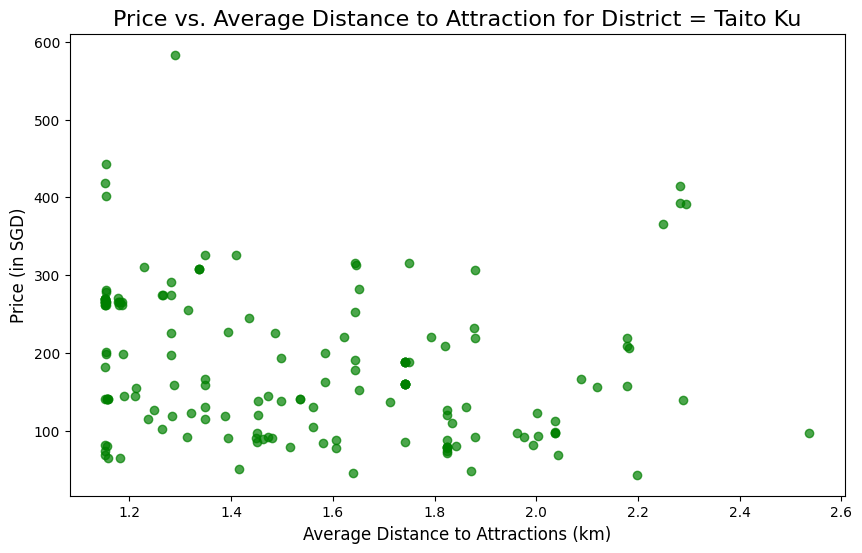

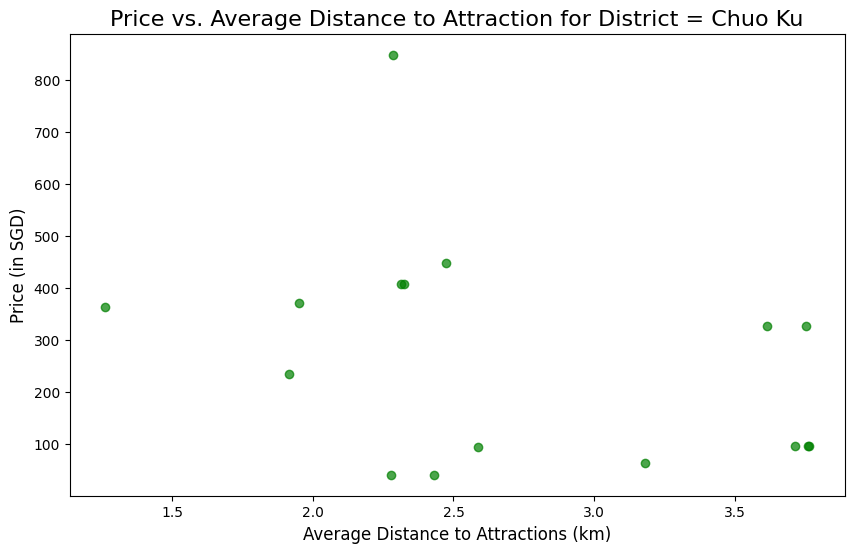

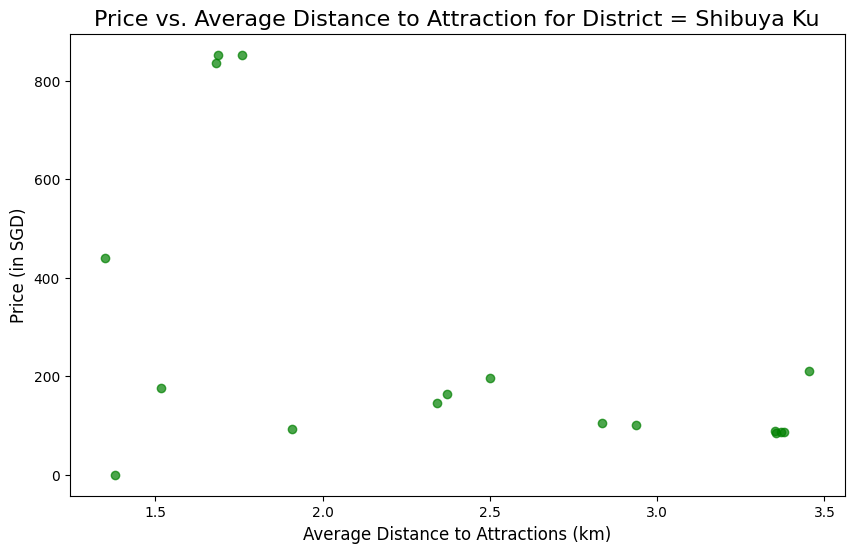

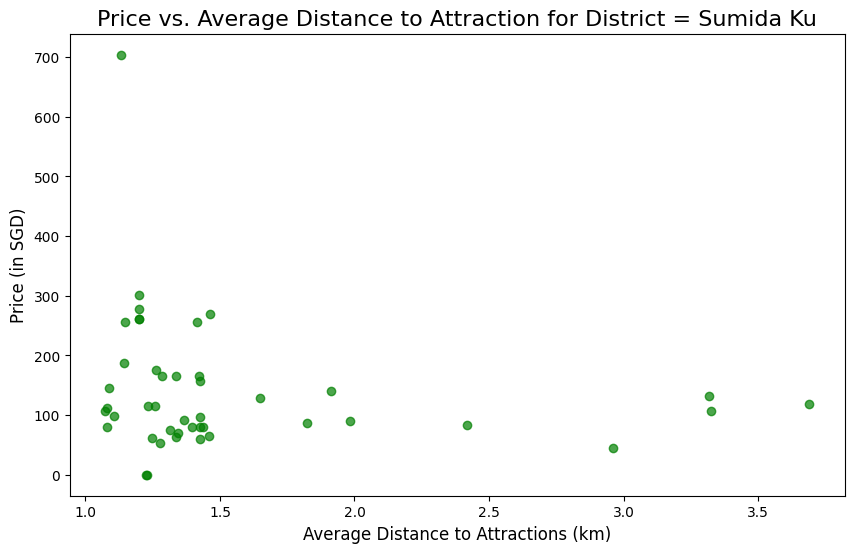

In [31]:
df_filter["Avg_Distance_to_Attraction_km"] = df_filter["Distances_to_Attractions_km"].apply(lambda x: np.mean(x) if isinstance(x, list) else float('nan'))

# Drop rows where either price or average distance is NaN
df_filtered_for_plot = df_filter.dropna(subset=["price", "Avg_Distance_to_Attraction_km"])

df_filtered_for_plot_Taito_Ku = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Taito Ku']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Taito_Ku["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Taito_Ku["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Taito Ku", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Chuo_Ku = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Chuo Ku']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Chuo_Ku["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Chuo_Ku["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Chuo Ku", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Batignolles_Shibuya_Ku = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Shibuya Ku']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Batignolles_Shibuya_Ku["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Batignolles_Shibuya_Ku["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Shibuya Ku", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()

df_filtered_for_plot_Sumida_Ku = df_filtered_for_plot[df_filtered_for_plot['neighbourhood_cleansed'] == 'Sumida Ku']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_for_plot_Sumida_Ku["Avg_Distance_to_Attraction_km"], df_filtered_for_plot_Sumida_Ku["price"], alpha=0.7, color='g')

# Set plot labels and title
plt.title("Price vs. Average Distance to Attraction for District = Sumida Ku", fontsize=16)
plt.xlabel("Average Distance to Attractions (km)", fontsize=12)
plt.ylabel("Price (in SGD)", fontsize=12)

# Display the plot
plt.show()


Inferential Statistics

In [32]:
df_HongKong = df[(df['City'] == 'Hong Kong') & (df['price'] > 0)];
df_NewYork = df[(df['City'] == 'New York') & (df['price'] > 0)];
df_Mexico_City = df[(df['City'] == 'Mexico City') & (df['price'] > 0)];
df_Paris = df[(df['City'] == 'Paris') & (df['price'] > 0)];
df_Rio = df[(df['City'] == 'Rio de Janeiro') & (df['price'] > 0)];
df_Tokyo = df[(df['City'] == 'Tokyo') & (df['price'] > 0)];

df_HongKong["price"] = df_HongKong["price"] * 0.169
df_NewYork["price"] = df_NewYork["price"] * 1.36;
df_Mexico_City["price"] = df_Mexico_City["price"] * 0.076
df_Paris["price"] = df_Paris["price"] * 1.62
df_Rio["price"] = df_Rio["price"] * 0.276
df_Tokyo["price"] = df_Tokyo["price"] * 0.0088

combined_df = pd.concat([df_HongKong, df_NewYork, df_Mexico_City, df_Paris, df_Rio, df_Tokyo], axis=0)


df_Hotel = combined_df[(combined_df['room_type'] == 'Hotel room') & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]
df_Private = combined_df[(combined_df['room_type'] == 'Private room') & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]


df_Hotel_mean = df_Hotel['price'].mean()
df_Hotel_std = df_Hotel['price'].std()

df_Private_mean = df_Private['price'].mean()
df_Private_std = df_Private['price'].std()

print('Hotel_mean ', df_Hotel_mean)
print('Hotel_std ', df_Hotel_std)

print('Private_mean ', df_Private_mean)
print('Private_std ', df_Private_std)

alpha = 0.05
n1 = 80;
n2 = 80;
u = stats.randint(0,183)
u1 = stats.randint(0,3606)
ls = u.rvs(size=n1)
ls1 = u1.rvs(size=n2)
rows = df_Hotel.iloc[ls]
rows1 = df_Private.iloc[ls1]

se_diff = np.sqrt((df_Hotel_std**2 / n1) + (df_Private_std**2 / n2))
print('Standard Deviation Error ', se_diff)
z_score = (df_Hotel_mean - df_Private_mean) / se_diff
print("z_score: %.3f" % z_score)

critical_value = stats.norm.ppf(1 - alpha / 2) # two-sided but we use the right-tailed value
print("critical_values: %.3f and %.3f" % (-critical_value, critical_value))
# Confidence Interval
print('Confidence Interval: ',stats.norm(loc = df_Hotel_mean - df_Private_mean, scale = se_diff).interval(.95))

Hotel_mean  535.9215300546449
Hotel_std  714.8188973002094
Private_mean  208.9941442041043
Private_std  894.128632618147
Standard Deviation Error  127.98594002883112
z_score: 2.554
critical_values: -1.960 and 1.960
Confidence Interval:  (np.float64(76.07955286652839), np.float64(577.7752188345529))


C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2824525608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HongKong["price"] = df_HongKong["price"] * 0.169
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2824525608.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NewYork["price"] = df_NewYork["price"] * 1.36;
C:\Users\ayush\AppData\Local\Temp\ipykernel_15424\2824525608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [33]:
# Tukey HSD returns TukeyHSDResults
tukeyhsd = pairwise_tukeyhsd(endog=d_ANOVA_df['value'], groups=d_ANOVA_df['group'], alpha=0.05)

tukeyhsd.summary()
#print(tukeyhsd)  # This works too, with only aesthetic differences in the output. 

NameError: name 'd_ANOVA_df' is not defined

,value
group,
Hong Kong,173.475120
Mexico City,95.553280
New York,162.384000
Paris,311.590800
Rio,183.827040
Tokyo,133.542112


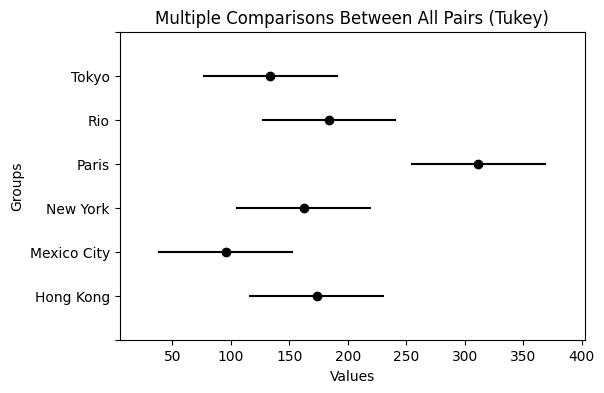

In [ ]:
# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Values', ylabel='Groups');
#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

# Since the output above did not specifically rank which club has a higer mean, let's display the mean for each Club for a meaning conclusion
d_ANOVA_df.groupby('group').mean()

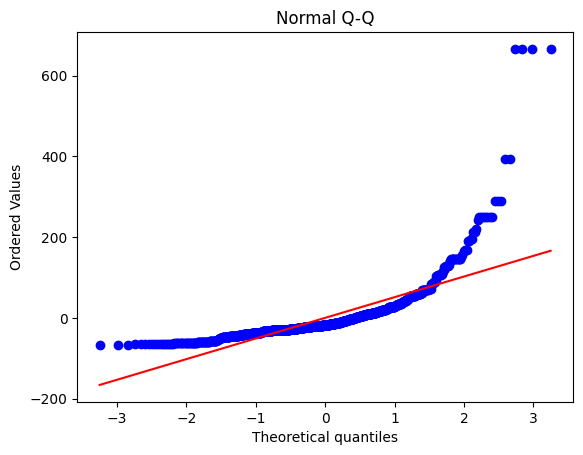

In [ ]:
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q')
plt.show()

In [ ]:
# 2 Way ANOVA
n = 30
asia_pacific = combined_df[((combined_df['City'] == 'Hong Kong') | (combined_df['City'] == 'Tokyo')) & ((combined_df['accommodates'] == 1) | (combined_df['accommodates'] == 2))]

u = stats.randint(0,9055)
ls = u.rvs(size=n)
asia_pacific_1_2_rows = asia_pacific.iloc[ls]

asia_pacific = combined_df[((combined_df['City'] == 'Hong Kong') | (combined_df['City'] == 'Tokyo')) & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]

u = stats.randint(0,6019)
ls = u.rvs(size=n)
asia_pacific_3_4_rows = asia_pacific.iloc[ls]

asia_pacific = combined_df[((combined_df['City'] == 'Hong Kong') | (combined_df['City'] == 'Tokyo')) & ((combined_df['accommodates'] >= 5))]

u = stats.randint(0,5735)
ls = u.rvs(size=n)
asia_pacific_5_rows = asia_pacific.iloc[ls]

europe = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['accommodates'] == 1) | (combined_df['accommodates'] == 2))]

u = stats.randint(0,29495)
ls = u.rvs(size=n)
europe_1_2_rows = europe.iloc[ls]

europe = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]

u = stats.randint(0,23964)
ls = u.rvs(size=n)
europe_3_4_rows = europe.iloc[ls]

europe = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['accommodates'] >= 5))]

u = stats.randint(0,10771)
ls = u.rvs(size=n)
europe_5_rows = europe.iloc[ls]

north_america = combined_df[((combined_df['City'] == 'New York') | (combined_df['City'] == 'Mexico City')) & ((combined_df['accommodates'] == 1) | (combined_df['accommodates'] == 2))]

u = stats.randint(0,11759)
ls = u.rvs(size=n)
north_america_1_2_rows = north_america.iloc[ls]

north_america = combined_df[((combined_df['City'] == 'New York') | (combined_df['City'] == 'Mexico City')) & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]

u = stats.randint(0,7479)
ls = u.rvs(size=n)
north_america_3_4_rows = north_america.iloc[ls]

north_america = combined_df[((combined_df['City'] == 'New York') | (combined_df['City'] == 'Mexico City')) & ((combined_df['accommodates'] >= 5))]

u = stats.randint(0,4500)
ls = u.rvs(size=n)
north_america_5_rows = north_america.iloc[ls]

south_america = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['accommodates'] == 1) | (combined_df['accommodates'] == 2))]

u = stats.randint(0,10443)
ls = u.rvs(size=n)
south_america_1_2_rows = south_america.iloc[ls]

south_america = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['accommodates'] == 3) | (combined_df['accommodates'] == 4))]

u = stats.randint(0,13848)
ls = u.rvs(size=n)
south_america_3_4_rows = south_america.iloc[ls]

south_america = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['accommodates'] >= 5))]

u = stats.randint(0,9400)
ls = u.rvs(size=n)
south_america_5_rows = south_america.iloc[ls]

print(north_america_5_rows['price'].mean())
data = {
    'Price': pd.concat([asia_pacific_1_2_rows['price'], 
                        asia_pacific_3_4_rows['price'], 
                        asia_pacific_5_rows['price'],
                        europe_1_2_rows['price'], 
                        europe_3_4_rows['price'], 
                        europe_5_rows['price'],
                        south_america_1_2_rows['price'], 
                        south_america_3_4_rows['price'], 
                        south_america_5_rows['price'],
                        north_america_1_2_rows['price'], 
                        north_america_3_4_rows['price'], 
                        north_america_5_rows['price']]).values, 
    'Traveller': ['1 to 2']*n + ['3 to 4']*n + ['>= 5']*n + ['1 to 2']*n + ['3 to 4']*n + ['>= 5']*n + ['1 to 2']*n + ['3 to 4']*n + ['>= 5']*n + ['1 to 2']*n + ['3 to 4']*n + ['>= 5']*n,  
    'Region': ['Asia-Pacific'] * 3*n + ['Europe'] * 3*n  + ['South America'] * 3*n + ['North America'] * 3*n  
}

df_2_ANOVA = pd.DataFrame(data)


165.7104


In [ ]:
# Fit the data into an OLS model and display the ANOVA table

model = ols('Price ~ C(Traveller) + C(Region) + C(Traveller):C(Region)', data=df_2_ANOVA).fit()
#model = ols('Score ~ C(Treatment) + C(Gender)', data=df).fit() # If you want to explicitly state that Treatment and Gender are categorical variables, use C(variable)

anova_table = sm.stats.anova_lm(model)
print(anova_table)

                           df        sum_sq       mean_sq          F  \
C(Traveller)              2.0  5.460974e+06  2.730487e+06  18.218188   
C(Region)                 3.0  7.791637e+06  2.597212e+06  17.328962   
C(Traveller):C(Region)    6.0  4.855173e+06  8.091954e+05   5.399064   
Residual                348.0  5.215719e+07  1.498770e+05        NaN   

                              PR(>F)  
C(Traveller)            2.987652e-08  
C(Region)               1.650047e-10  
C(Traveller):C(Region)  2.372619e-05  
Residual                         NaN  


In [ ]:
# Region

# Performing Tukey Pairwise Comparisons
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['Price'], groups=df_2_ANOVA['Region'], alpha=0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Asia-Pacific,Europe,304.2102,0.0,143.02,465.4005,True
Asia-Pacific,North America,-78.1323,0.5947,-239.3225,83.058,False
Asia-Pacific,South America,-5.982,0.9997,-167.1723,155.2082,False
Europe,North America,-382.3425,0.0,-543.5327,-221.1522,True
Europe,South America,-310.1923,0.0,-471.3825,-149.002,True
North America,South America,72.1502,0.6554,-89.04,233.3405,False


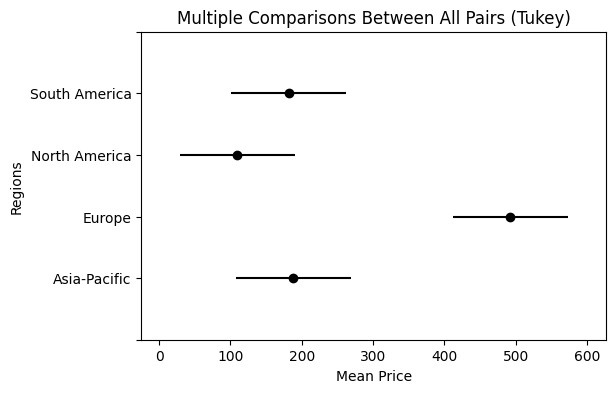

In [ ]:
# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Mean Price', ylabel='Regions');
#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

In [ ]:
# Traveller

# Performing Tukey Pairwise Comparisons
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['Price'], groups=df_2_ANOVA['Traveller'], alpha=0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1 to 2,3 to 4,63.2486,0.4841,-66.2041,192.7012,False
1 to 2,>= 5,287.0883,0.0,157.6357,416.541,True
3 to 4,>= 5,223.8398,0.0002,94.3871,353.2924,True


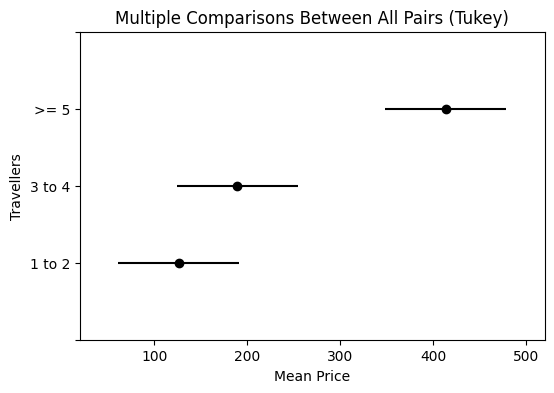

In [ ]:
# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Mean Price', ylabel='Travellers');
#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

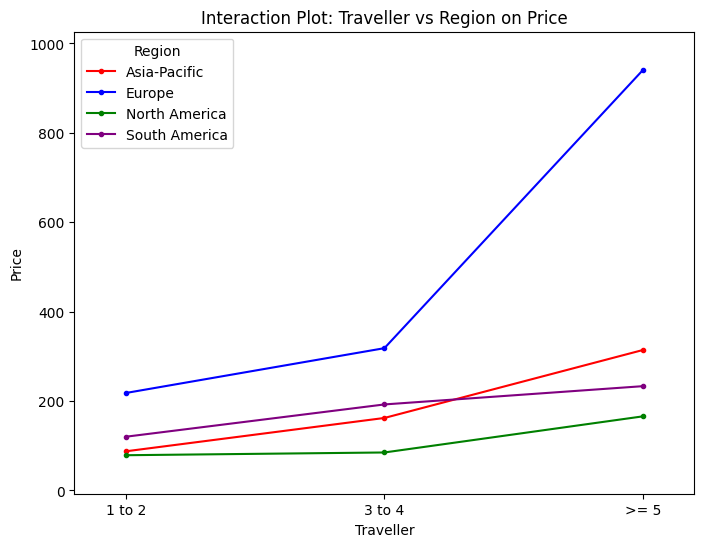

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

interaction_plot(
    df_2_ANOVA['Traveller'],    # First categorical variable
    df_2_ANOVA['Region'],        # Second categorical variable
    df_2_ANOVA['Price'],         # Dependent variable (Price)
    colors=['red', 'blue', 'green', 'purple'],  # Optional: colors for lines
    # markers=['D', '^', 'o'],     # Optional: marker types
    # ms=10,  # Marker size
    ax=ax
)

plt.xlabel('Traveller')
plt.ylabel('Price')
plt.title('Interaction Plot: Traveller vs Region on Price')
plt.show()

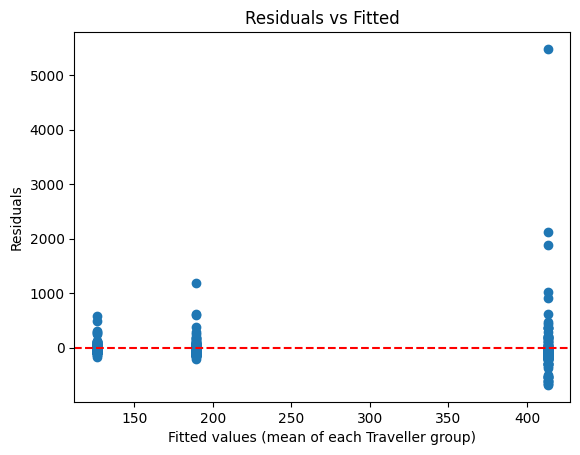

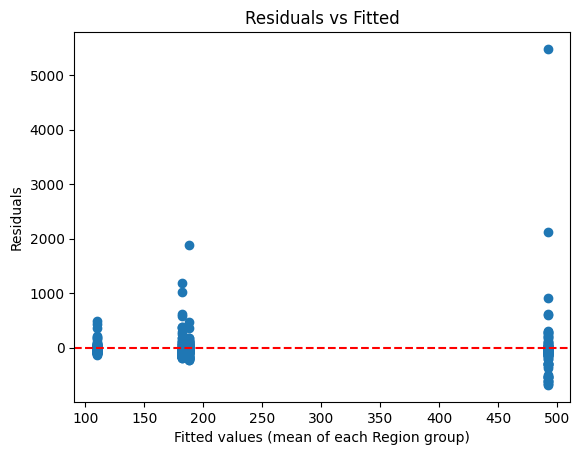

In [ ]:
# Check the homogeneity of variance assumption
plt.figure()
group_means = df_2_ANOVA.groupby('Traveller')['Price'].mean()
plt.scatter(df_2_ANOVA['Traveller'].map(group_means), model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (mean of each Traveller group)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

plt.figure()
group_means = df_2_ANOVA.groupby('Region')['Price'].mean()
plt.scatter(df_2_ANOVA['Region'].map(group_means), model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (mean of each Region group)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [ ]:
# 2 Way ANOVA
n = 400
tk = combined_df[((combined_df['City'] == 'Tokyo')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,tk.shape[0])
ls = u.rvs(size=n)
tk_Entire_home_apt_rows = tk.iloc[ls]

tk = combined_df[((combined_df['City'] == 'Tokyo')) & ((combined_df['room_type'] == 'Hotel room'))]

u = stats.randint(0,tk.shape[0])
ls = u.rvs(size=n)
tk_Hotel_room_rows = tk.iloc[ls]

tk = combined_df[((combined_df['City'] == 'Tokyo')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,tk.shape[0])
ls = u.rvs(size=n)
tk_Private_room_rows = tk.iloc[ls]

tk = combined_df[((combined_df['City'] == 'Tokyo')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,tk.shape[0])
ls = u.rvs(size=n)
tk_Shared_room_rows = tk.iloc[ls]


hk = combined_df[((combined_df['City'] == 'Hong Kong')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,tk.shape[0])
ls = u.rvs(size=n)
hk_Entire_home_apt_rows = hk.iloc[ls]

hk = combined_df[((combined_df['City'] == 'Hong Kong')) & ((combined_df['room_type'] == 'Hotel room'))]

u = stats.randint(0,hk.shape[0])
ls = u.rvs(size=n)
hk_Hotel_room_rows = hk.iloc[ls]

hk = combined_df[((combined_df['City'] == 'Hong Kong')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,hk.shape[0])
ls = u.rvs(size=n)
hk_Private_room_rows = hk.iloc[ls]

hk = combined_df[((combined_df['City'] == 'Hong Kong')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,hk.shape[0])
ls = u.rvs(size=n)
hk_Shared_room_rows = hk.iloc[ls]



paris = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,paris.shape[0])
ls = u.rvs(size=n)
paris_Entire_home_apt_rows = paris.iloc[ls]

paris = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['room_type'] == 'Hotel room'))]

u = stats.randint(0,paris.shape[0])
ls = u.rvs(size=n)
paris_Hotel_room_rows = paris.iloc[ls]

paris = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,paris.shape[0])
ls = u.rvs(size=n)
paris_Private_room_rows = paris.iloc[ls]

paris = combined_df[((combined_df['City'] == 'Paris')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,paris.shape[0])
ls = u.rvs(size=n)
paris_Shared_room_rows = paris.iloc[ls]


ny = combined_df[((combined_df['City'] == 'New York')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,ny.shape[0])
ls = u.rvs(size=n)
ny_Entire_home_apt_rows = ny.iloc[ls]

ny = combined_df[((combined_df['City'] == 'New York')) & ((combined_df['room_type'] == 'Hotel room'))]
if ny.shape[0] == 0:
    ny_Hotel_room_rows = pd.DataFrame({'price': [0] * n});
else:
    u = stats.randint(0,ny.shape[0])
    ls = u.rvs(size=n)
    ny_Hotel_room_rows = ny.iloc[ls]

ny = combined_df[((combined_df['City'] == 'New York')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,ny.shape[0])
ls = u.rvs(size=n)
ny_Private_room_rows = ny.iloc[ls]

ny = combined_df[((combined_df['City'] == 'New York')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,ny.shape[0])
ls = u.rvs(size=n)
ny_Shared_room_rows = ny.iloc[ls]


mc = combined_df[((combined_df['City'] == 'Mexico City')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,mc.shape[0])
ls = u.rvs(size=n)
mc_Entire_home_apt_rows = mc.iloc[ls]

mc = combined_df[((combined_df['City'] == 'Mexico City')) & ((combined_df['room_type'] == 'Hotel room'))]

u = stats.randint(0,mc.shape[0])
ls = u.rvs(size=n)
mc_Hotel_room_rows = mc.iloc[ls]

mc = combined_df[((combined_df['City'] == 'Mexico City')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,mc.shape[0])
ls = u.rvs(size=n)
mc_Private_room_rows = mc.iloc[ls]

mc = combined_df[((combined_df['City'] == 'Mexico City')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,mc.shape[0])
ls = u.rvs(size=n)
mc_Shared_room_rows = mc.iloc[ls]



rio = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['room_type'] == 'Entire home/apt'))]


u = stats.randint(0,rio.shape[0])
ls = u.rvs(size=n)
rio_Entire_home_apt_rows = rio.iloc[ls]

mc = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['room_type'] == 'Hotel room'))]

u = stats.randint(0,rio.shape[0])
ls = u.rvs(size=n)
rio_Hotel_room_rows = rio.iloc[ls]

rio = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['room_type'] == 'Private room'))]

u = stats.randint(0,rio.shape[0])
ls = u.rvs(size=n)
rio_Private_room_rows = rio.iloc[ls]

rio = combined_df[((combined_df['City'] == 'Rio de Janeiro')) & ((combined_df['room_type'] == 'Shared room'))]

u = stats.randint(0,rio.shape[0])
ls = u.rvs(size=n)
rio_Shared_room_rows = rio.iloc[ls]

print(paris_Entire_home_apt_rows['price'].mean(), 
                        paris_Hotel_room_rows['price'].mean(), 
                        paris_Private_room_rows['price'].mean(),
                        paris_Shared_room_rows['price'].mean(),)

data = {
    'Price': pd.concat([tk_Entire_home_apt_rows['price'], 
                        tk_Hotel_room_rows['price'], 
                        tk_Private_room_rows['price'],
                        tk_Shared_room_rows['price'],
                        # hk_Entire_home_apt_rows['price'], 
                        # hk_Hotel_room_rows['price'], 
                        # hk_Private_room_rows['price'],
                        # hk_Shared_room_rows['price'],
                        paris_Entire_home_apt_rows['price'], 
                        paris_Hotel_room_rows['price'], 
                        paris_Private_room_rows['price'],
                        paris_Shared_room_rows['price'],
                        # ny_Entire_home_apt_rows['price'], 
                        # ny_Hotel_room_rows['price'], 
                        # ny_Private_room_rows['price'],
                        # ny_Shared_room_rows['price'],
                        mc_Entire_home_apt_rows['price'], 
                        mc_Hotel_room_rows['price'], 
                        mc_Private_room_rows['price'],
                        mc_Shared_room_rows['price'],
                        # rio_Entire_home_apt_rows['price'], 
                        # rio_Hotel_room_rows['price'], 
                        # rio_Private_room_rows['price'],
                        # rio_Shared_room_rows['price']
                        ]).values, 
    'Room_Type': ['Entire home/apt']*n + ['Hotel room']*n + ['Private room']*n + ['Shared room']*n + ['Entire home/apt']*n + ['Hotel room']*n + ['Private room']*n + ['Shared room']*n + ['Entire home/apt']*n + ['Hotel room']*n + ['Private room']*n + ['Shared room']*n,  
    'Country': ['Tokyo'] * 4*n + ['Paris'] * 4*n + ['Mexico'] * 4*n  
}

df_2_ANOVA = pd.DataFrame(data)


# Apply log transformation to the price column
df_2_ANOVA['Price'] = np.log(df_2_ANOVA['Price'] + 1)  # Add 1 to avoid log(0)

df_2_ANOVA

390.28635 504.27765 303.55965000000003 208.12545000000003


,Price,Room_Type,Country
0,3.862009,Entire home/apt,Tokyo
1,4.360762,Entire home/apt,Tokyo
2,5.014627,Entire home/apt,Tokyo
3,5.730518,Entire home/apt,Tokyo
4,5.132607,Entire home/apt,Tokyo
...,...,...,...
4795,2.995732,Shared room,Mexico
4796,4.523135,Shared room,Mexico
4797,3.550192,Shared room,Mexico
4798,3.169686,Shared room,Mexico


In [ ]:
# df_2_ANOVA = df_2_ANOVA[df_2_ANOVA['Price'] < 8.5]
# df_2_ANOVA

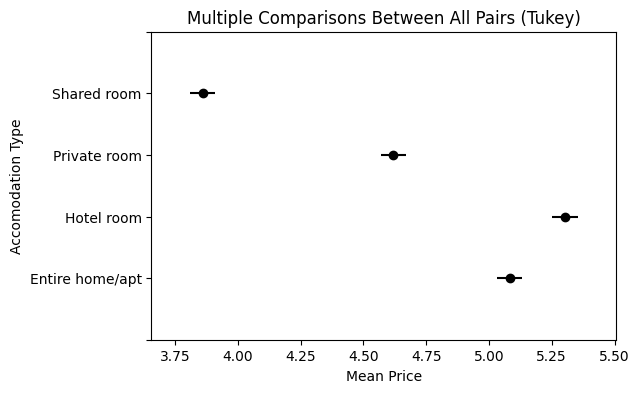

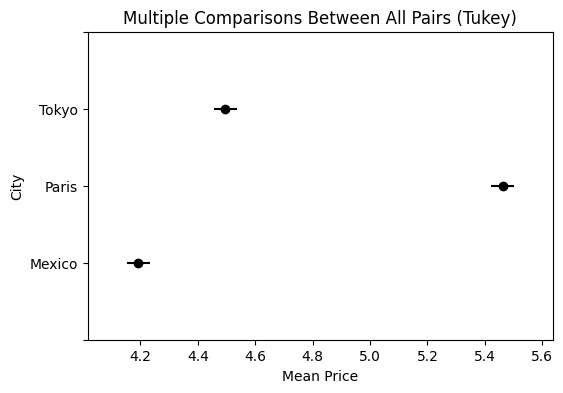

In [ ]:
# Traveller

# Performing Tukey Pairwise Comparisons
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['Price'], groups=df_2_ANOVA['Room_Type'], alpha=0.05)
tukeyhsd.summary()

# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Mean Price', ylabel='Accomodation Type');
#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.



tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['Price'], groups=df_2_ANOVA['Country'], alpha=0.05)
tukeyhsd.summary()

# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Mean Price', ylabel='City');
#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

In [ ]:
# Fit the data into an OLS model and display the ANOVA table

model = ols('Price ~ C(Room_Type) + C(Country) + C(Room_Type):C(Country)', data=df_2_ANOVA).fit()
#model = ols('Score ~ C(Treatment) + C(Gender)', data=df).fit() # If you want to explicitly state that Treatment and Gender are categorical variables, use C(variable)

anova_table = sm.stats.anova_lm(model)
print(anova_table)

                             df       sum_sq     mean_sq            F  \
C(Room_Type)                3.0  1462.372557  487.457519   811.787286   
C(Country)                  2.0  1406.271503  703.135752  1170.966989   
C(Room_Type):C(Country)     6.0   137.595060   22.932510    38.190651   
Residual                 4788.0  2875.071638    0.600474          NaN   

                               PR(>F)  
C(Room_Type)             0.000000e+00  
C(Country)               0.000000e+00  
C(Room_Type):C(Country)  1.515859e-45  
Residual                          NaN  


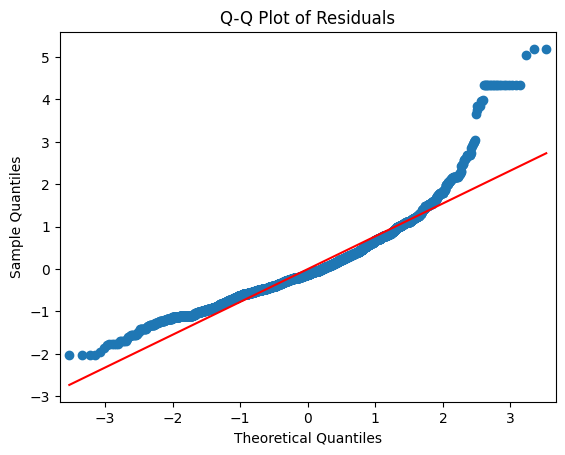

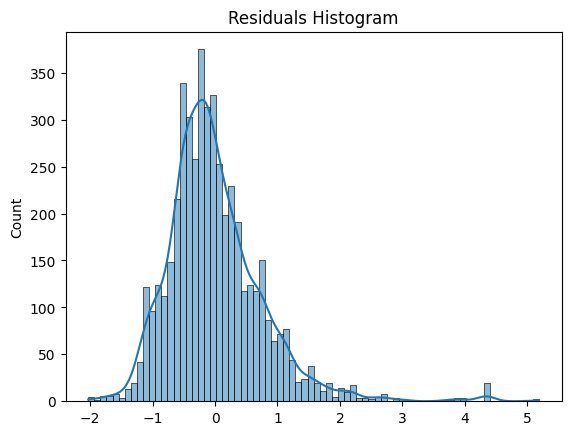

In [ ]:
residuals = model.resid;
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('Normal Q-Q')
# plt.show()

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()
 
# Plot a histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.show()

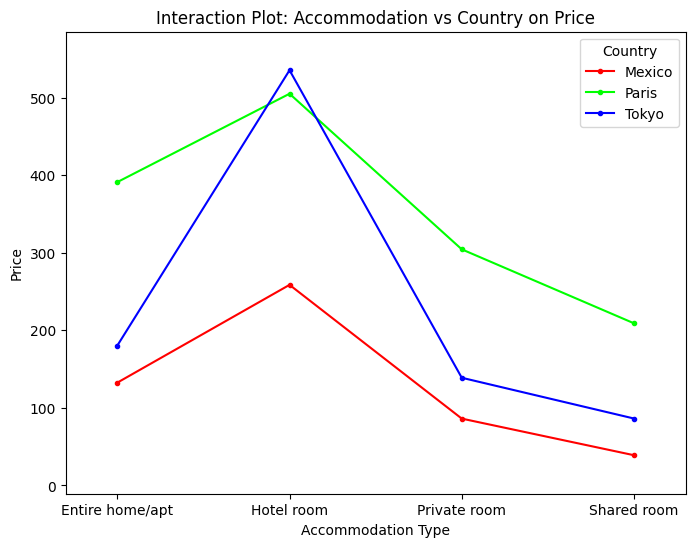

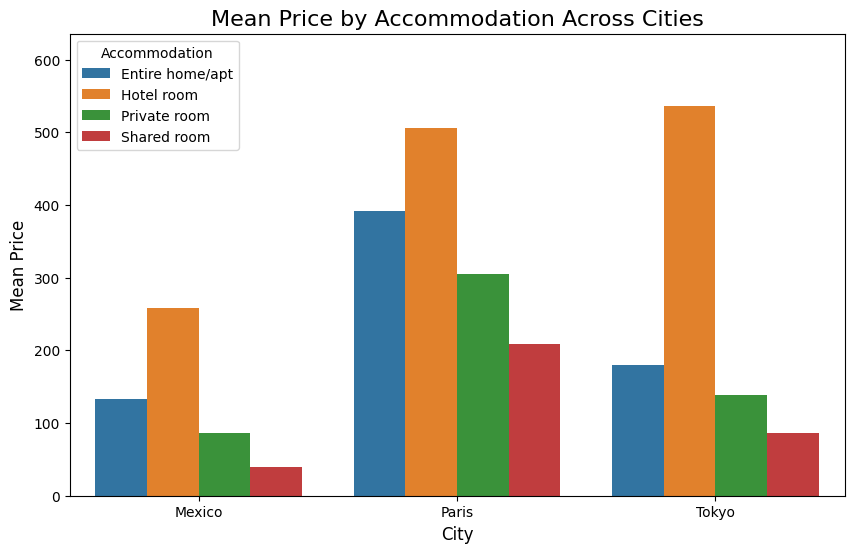

In [ ]:
# Interaction plot with the original price scale
fig, ax = plt.subplots(figsize=(8, 6))
interaction_plot(
    df_2_ANOVA['Room_Type'],    # First categorical variable
    df_2_ANOVA['Country'],      # Second categorical variable
    np.exp(df_2_ANOVA['Price']), # Dependent variable (Price in original scale)
    ax=ax
)

plt.xlabel('Accommodation Type')
plt.ylabel('Price')
plt.title('Interaction Plot: Accommodation vs Country on Price')
plt.show()

# Convert log price back to normal price in grouped data
grouped_data = df_2_ANOVA.copy()
grouped_data['Price'] = np.exp(grouped_data['Price'])
grouped_data = grouped_data.groupby(['Country', 'Room_Type']).agg({'Price': 'mean'}).reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x='Country', y='Price', hue='Room_Type', data=grouped_data)

# Set the title and labels
plt.title('Mean Price by Accommodation Across Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.ylim(0, grouped_data['Price'].max() + 100)  # Adjust as needed
legend = plt.legend()
legend.set_title("Accommodation")

plt.show()

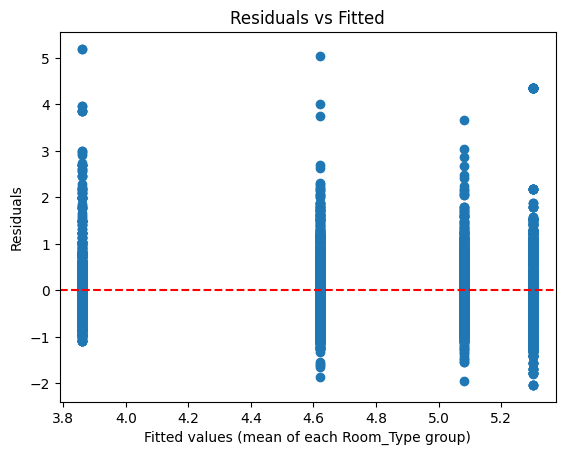

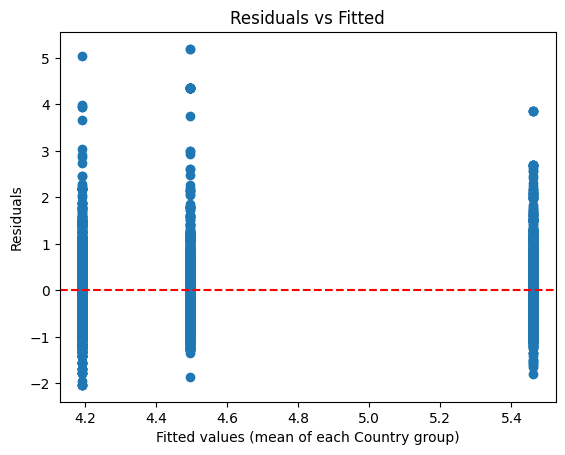

In [ ]:
# Check the homogeneity of variance assumption
plt.figure()
group_means = df_2_ANOVA.groupby('Room_Type')['Price'].mean()
plt.scatter(df_2_ANOVA['Room_Type'].map(group_means), model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (mean of each Room_Type group)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

plt.figure()
group_means = df_2_ANOVA.groupby('Country')['Price'].mean()
plt.scatter(df_2_ANOVA['Country'].map(group_means), model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (mean of each Country group)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [ ]:
pt = [];
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        'Tokyo'
    ],
    "Latitude": [
        "35.667° N"
    ],
    "Longitude": [
        "139.739° E"
    ],
    "District": [
        'Tokyo'
    ]
}
)
df_Tokyo = combined_df[combined_df['City'] == 'Tokyo']

# Initialize lists to store data for plotting
distance_list = []
room_type_list = []
mean_price_list = []
ci_lower_list = []
ci_upper_list = []

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Tokyo["latitude"] = df_Tokyo["latitude"].astype(str)
df_Tokyo["longitude"] = df_Tokyo["longitude"].astype(str)
df_Tokyo["Latitude_decimal"] = df_Tokyo["latitude"].apply(convert_to_decimal)
df_Tokyo["Longitude_decimal"] = df_Tokyo["longitude"].apply(convert_to_decimal)

df_Tokyo = group_distance_price(df_attraction, df_Tokyo);

neighbourhood_cleansed = np.array(df_Tokyo['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Tokyo))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Tokyo

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        if x == 'Edogawa Ku':
            pt = rows[rows['neighbourhood_cleansed'] == x]
        print(" For ", x,':')

        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())

C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\3785368361.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tokyo["latitude"] = df_Tokyo["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\3785368361.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tokyo["longitude"] = df_Tokyo["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\3785368361.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

 For  Sumida Ku :
0.05057572735219513
8.012454670412618
158.42490241645245
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           5.54e-09
Time:                        20:51:39   Log-Likelihood:                -2024.3
No. Observations:                1945   AIC:                             4053.
Df Residuals:                    1943   BIC:                             4064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 o

0.2921114700557511
27.2357946565821
93.2376761904762
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2252
Date:                Sat, 02 Nov 2024   Prob (F-statistic):              0.641
Time:                        20:51:39   Log-Likelihood:                -21.844
No. Observations:                  21   AIC:                             47.69
Df Residuals:                      19   BIC:                             49.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20

 For  Chiyoda Ku :
0.022767852574997513
4.554794713972645
200.05376875000002
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2515
Date:                Sat, 02 Nov 2024   Prob (F-statistic):              0.617
Time:                        20:51:39   Log-Likelihood:                -129.22
No. Observations:                 128   AIC:                             262.4
Df Residuals:                     126   BIC:                             268.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


              df        sum_sq       mean_sq          F        PR(>F)
group        3.0  4.635874e+06  1.545291e+06  44.568671  1.173034e-27
Residual  1596.0  5.533674e+07  3.467214e+04        NaN           NaN


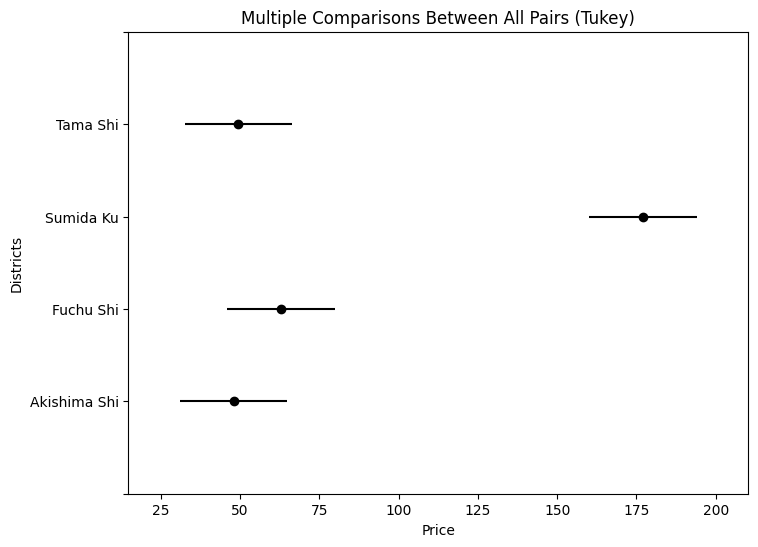

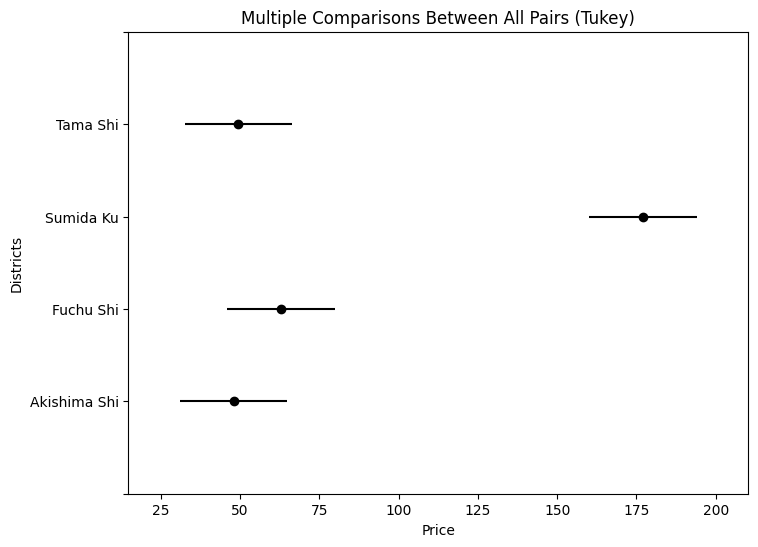

In [ ]:
data = {
    'value': pd.concat([
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Akishima Shi']['price'].sample(n=400, replace=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['price'].sample(n=400, replace=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Sumida Ku']['price'].sample(n=400, replace=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Tama Shi']['price'].sample(n=400, replace=True)
    ]),
    'group': ['Akishima Shi'] * 400 + ['Fuchu Shi'] * 400 + ['Sumida Ku'] * 400 + ['Tama Shi'] * 400
}

df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# Perform Tukey's HSD test
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize=(8, 6), xlabel='Price', ylabel='Districts')

In [ ]:
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Hong Kong Disneyland", "Tian Tan Buddha", "Ngong Ping 360", "Ocean Park", 
        "Nan Lian Garden", "Sky100", "Hong Kong Space Museum", 
        "Temple Street Night Market", "Hong Kong Zoological and Botanical Gardens", 
        "Man Mo Temple"
    ],
    "Latitude": [
        "22.3130° N", "22.2540° N", "22.2563° N", "22.2467° N", 
        "22.3396° N", "22.3034° N", "22.2943° N", 
        "22.3065° N", "22.2768° N", "22.2840° N"
    ],
    "Longitude": [
        "114.0413° E", "113.9050° E", "113.9014° E", "114.1757° E", 
        "114.2045° E", "114.1603° E", "114.1719° E", 
        "114.1700° E", "114.1560° E", "114.1502° E"
    ],
    "District": [
        "Islands", "Islands", "Islands", "Southern", 
        "Kowloon City", "Yau Tsim Mong", "Yau Tsim Mong", 
        "Yau Tsim Mong", "Central & Western", "Central & Western"
    ]
}
)

# Initialize lists to store data for plotting
distance_list = []
room_type_list = []
mean_price_list = []
ci_lower_list = []
ci_upper_list = []

df_Hong_Kong = combined_df[combined_df['City'] == 'Hong Kong']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Hong_Kong["latitude"] = df_Hong_Kong["latitude"].astype(str)
df_Hong_Kong["longitude"] = df_Hong_Kong["longitude"].astype(str)
df_Hong_Kong["Latitude_decimal"] = df_Hong_Kong["latitude"].apply(convert_to_decimal)
df_Hong_Kong["Longitude_decimal"] = df_Hong_Kong["longitude"].apply(convert_to_decimal)

df_Hong_Kong = group_distance_price(df_attraction, df_Hong_Kong);

Accommodation_Type = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'];
distance = ['0-3.9 km', '4-5.9 km', '6-9 km', '9 km+']

for d in distance:
    for act in Accommodation_Type:
        df_filter = df_Hong_Kong[
            (df_Hong_Kong['room_type'] == act) &
            (df_Hong_Kong['Distance_Range'] == d)
        ]
        if df_filter.shape[0] > 0:
            # Adjust sample size to not exceed available rows
            sample_size = min(100, df_filter.shape[0])
            ls = np.random.choice(df_filter.index, size=sample_size, replace=True)
            rows = df_filter.loc[ls]
            
            # Calculate mean and standard deviation of the price
            mean_price = rows['price'].mean()
            std_price = rows['price'].std()
            
            # Calculate confidence interval
            ci = stats.norm(loc=mean_price, scale=std_price / np.sqrt(sample_size)).interval(0.95)
            print(f'CI for {act} and {d} : {ci}')
            # Append data for plotting
            distance_list.append(d)
            room_type_list.append(act)
            mean_price_list.append(mean_price)
            ci_lower_list.append(ci[0])
            ci_upper_list.append(ci[1])
        else:
            print(f'No data for {act} in distance range {d}.')

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Distance': distance_list,
    'Room_Type': room_type_list,
    'Mean_Price': mean_price_list,
    'CI_Lower': ci_lower_list,
    'CI_Upper': ci_upper_list
})

# Calculate the error for the error bars (upper bound - lower bound)
plot_data['CI_Error'] = plot_data['CI_Upper'] - plot_data['CI_Lower']

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Distance', y='Mean_Price', hue='Room_Type', data=plot_data, ci=None, palette="muted")

# Add error bars (CI)
for i in range(plot_data.shape[0]):
    plt.errorbar(
        x=i // len(Accommodation_Type),  # Group by distance
        y=plot_data['Mean_Price'][i],
        yerr=plot_data['CI_Error'][i],
        fmt='none',  # No line connecting error bars
        c='black', capsize=5
    )

# Set plot labels and title
plt.xlabel('Distance Group')
plt.ylabel('Confidence Interval Difference')
plt.title('Confidence Intervals of Prices for Room Types Across Distance Groups for Hong Kong')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2617833270.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Hong_Kong["latitude"] = df_Hong_Kong["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2617833270.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Hong_Kong["longitude"] = df_Hong_Kong["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2617833270.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

KeyError: 'Distance_Range'

In [ ]:
from random import seed

kt = [];
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Paris"
    ],
    "Latitude": [
        "48.8534° N"
    ],
    "Longitude": [
        "2.3488° E"
    ],
    "District": [
        "Paris"
    ]
}
)

# Initialize lists to store data for plotting
distance_list = []
room_type_list = []
mean_price_list = []
ci_lower_list = []
ci_upper_list = []

df_Paris = combined_df[combined_df['City'] == 'Paris']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Paris["latitude"] = df_Paris["latitude"].astype(str)
df_Paris["longitude"] = df_Paris["longitude"].astype(str)
df_Paris["Latitude_decimal"] = df_Paris["latitude"].apply(convert_to_decimal)
df_Paris["Longitude_decimal"] = df_Paris["longitude"].apply(convert_to_decimal)

df_Paris = group_distance_price(df_attraction, df_Paris);

neighbourhood_cleansed = np.array(df_Paris['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Paris))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Paris

    if x == 'Gobelins':
            kt = rows[rows['neighbourhood_cleansed'] == x]

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        print(" For ", x,':')

        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())


C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2610667839.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris["latitude"] = df_Paris["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2610667839.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris["longitude"] = df_Paris["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\2610667839.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

 For  Observatoire :
0.00928814145913247
3.045563773715704
327.8980824222035
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     67.21
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           3.95e-16
Time:                        17:53:09   Log-Likelihood:                -2448.8
No. Observations:                2378   AIC:                             4902.
Df Residuals:                    2376   BIC:                             4913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

              df        sum_sq       mean_sq          F        PR(>F)
group        3.0  1.945821e+07  6.486070e+06  15.382145  7.222669e-10
Residual  1596.0  6.729730e+08  4.216623e+05        NaN           NaN


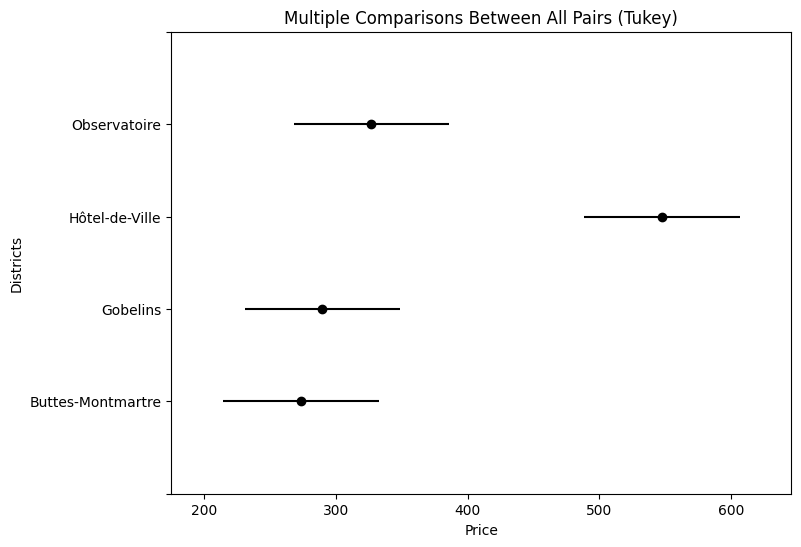

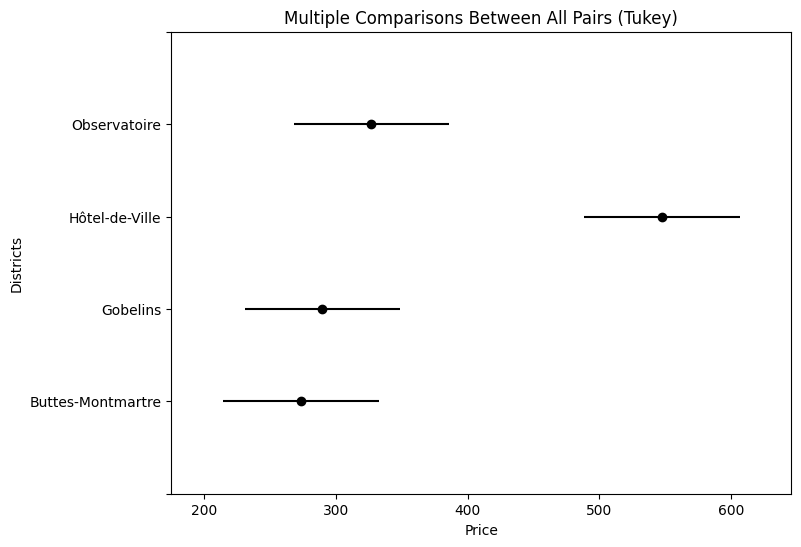

In [ ]:
data = {
    'value': pd.concat([
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sample(n=400, replace=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Gobelins']['price'].sample(n=400, replace=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['price'].sample(n=400, replace=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Observatoire']['price'].sample(n=400, replace=True)
    ]),
    'group': ['Buttes-Montmartre'] * 400 + ['Gobelins'] * 400 + ['Hôtel-de-Ville'] * 400 + ['Observatoire'] * 400
}

df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# Perform Tukey's HSD test
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize=(8, 6), xlabel='Price', ylabel='Districts')

In [ ]:
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Mexico"
    ],
    "Latitude": [
        "35.0844° N"
    ],
    "Longitude": [
        "106.6504° W"
    ],
    "District": [
        "Mexico"
    ]
}
)

ct = [];

df_Mexico_City = combined_df[combined_df['City'] == 'Mexico City']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Mexico_City["latitude"] = df_Mexico_City["latitude"].astype(str)
df_Mexico_City["longitude"] = df_Mexico_City["longitude"].astype(str)
df_Mexico_City["Latitude_decimal"] = df_Mexico_City["latitude"].apply(convert_to_decimal)
df_Mexico_City["Longitude_decimal"] = df_Mexico_City["longitude"].apply(convert_to_decimal)

df_Mexico_City = group_distance_price(df_attraction, df_Mexico_City);

neighbourhood_cleansed = np.array(df_Mexico_City['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Mexico_City))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Mexico_City
    if x == 'Cuauhtemoc':
            ct = rows[rows['neighbourhood_cleansed'] == x]

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        print(" For ", x,':')


        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())


#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Miguel Hidalgo']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())


    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Gustavo A. Madero']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Coyoacan']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Tlalpan']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\795435806.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico_City["latitude"] = df_Mexico_City["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\795435806.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico_City["longitude"] = df_Mexico_City["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15948\795435806.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

 For  Cuauhtemoc :
15.214212784336684
1890.6946882159564
124.27160806916424
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     337.4
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           2.92e-74
Time:                        20:57:17   Log-Likelihood:                -12253.
No. Observations:               11104   AIC:                         2.451e+04
Df Residuals:                   11102   BIC:                         2.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

              df        sum_sq       mean_sq          F        PR(>F)
group        2.0  1.663781e+05  83189.031089  28.807434  6.037497e-13
Residual  1197.0  3.456652e+06   2887.762667        NaN           NaN


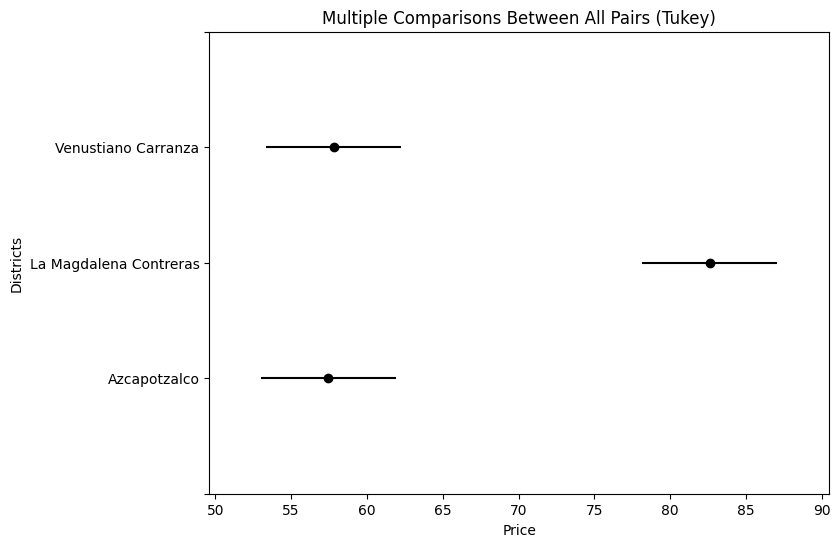

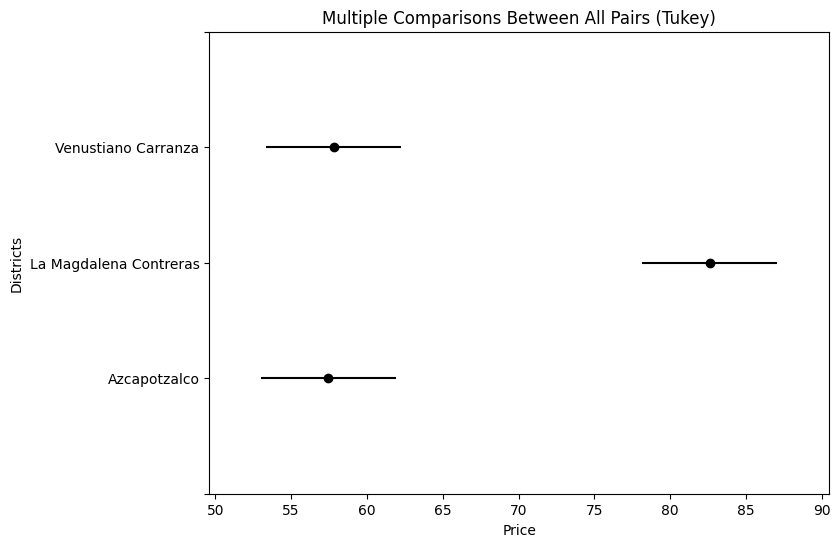

In [ ]:
data = {
    'value': pd.concat([
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Venustiano Carranza']['price'].sample(n=400, replace=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['price'].sample(n=400, replace=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Azcapotzalco']['price'].sample(n=400, replace=True)
    ]),
    'group': ['Venustiano Carranza'] * 400 + ['La Magdalena Contreras'] * 400 + ['Azcapotzalco'] * 400
}

df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# Perform Tukey's HSD test
tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Plotting intervals of each group on the same graph
tukeyhsd.plot_simultaneous(figsize=(8, 6), xlabel='Price', ylabel='Districts')

In [ ]:
df_attraction = pd.DataFrame(
    {
    "Attractions": [
            "Central Park", "The Metropolitan Museum of Art", "Times Square", 
            "American Museum of Natural History", "Empire State Building", 
            "St. Patrick's Cathedral", "Top of the Rock", "Grand Central Terminal", 
            "Statue of Liberty", "Brooklyn Bridge"
        ],
        "Latitude": [
            "40.7826° N", "40.7794° N", "40.7575° N", 
            "40.7813° N", "40.7484° N", "40.7586° N", 
            "40.7593° N", "40.7534° N", "40.6892° N", 
            "40.7061° N"
        ],
        "Longitude": [
            "73.9656° W", "73.9632° W", "73.9858° W", 
            "73.9740° W", "73.9857° W", "73.9762° W", 
            "73.9794° W", "73.9768° W", "74.0445° W", 
            "73.9969° W"
        ],
        "District": [
            "Upper West Side", "Upper East Side", "Theater District", 
            "Upper West Side", "Midtown", "Midtown", 
            "Midtown", "Murray Hill", "Financial District", 
            "Civic Center"
        ]
}
)

distance_list = []
room_type_list= []
mean_price_list= []
ci_lower_list= []
ci_upper_list= []

df_NewYork = combined_df[combined_df['City'] == 'New York']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_NewYork["latitude"] = df_NewYork["latitude"].astype(str)
df_NewYork["longitude"] = df_NewYork["longitude"].astype(str)
df_NewYork["Latitude_decimal"] = df_NewYork["latitude"].apply(convert_to_decimal)
df_NewYork["Longitude_decimal"] = df_NewYork["longitude"].apply(convert_to_decimal)

df_NewYork = group_distance_price(df_attraction, df_NewYork);

# Save the updated DataFrame to CSV
df_NewYork.to_csv("output_dataframe.csv", index=False)

Accommodation_Type = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'];
distance = ['0-3.9 km', '4-5.9 km', '6-9 km', '9 km+']

for d in distance:
    for act in Accommodation_Type:
        df_filter = df_NewYork[
            (df_NewYork['room_type'] == act) &
            (df_NewYork['Distance_Range'] == d)
        ]
        if df_filter.shape[0] > 0:
            # Adjust sample size to not exceed available rows
            sample_size = min(100, df_filter.shape[0])
            ls = np.random.choice(df_filter.index, size=sample_size, replace=True)
            rows = df_filter.loc[ls]
            
            # Calculate mean and standard deviation of the price
            mean_price = rows['price'].mean()
            std_price = rows['price'].std()
            
            # Calculate confidence interval
            ci = stats.norm(loc=mean_price, scale=std_price / np.sqrt(sample_size)).interval(0.95)
            print(f'CI for {act} and {d} : {ci}')
        else:
            print(f'No data for {act} in distance range {d}.')

NameError: name 'convert_to_decimal' is not defined

In [ ]:
d = combined_df[(combined_df['City'] == 'Mexico City') | (combined_df['City'] == 'Paris') | (combined_df['City'] == 'Tokyo')]

listing_counts = d.groupby(['City', 'room_type']).size().reset_index(name='Count')

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the data using seaborn
sns.barplot(x='City', y='Count', hue='room_type', data=listing_counts)

# Set the title and labels
plt.title('Number of Listings by Accommodation Type for Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.legend(title='Accommodation Type')

# Display the plot
plt.show()



plt.figure(figsize=(10, 6))

kt = df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'].isin([
    'Venustiano Carranza', 'Coyoacán', #'Azcapotzalco',
    'La Magdalena Contreras'
])]
kt = pd.concat([
    kt, 
    df_Tokyo[df_Tokyo['neighbourhood_cleansed'].isin(['Tama Shi',  'Ome Shi', 'Edogawa Ku'])], #'Akishima Shi',
    df_Paris[df_Paris['neighbourhood_cleansed'].isin(['Buttes-Montmartre', 'Ménilmontant', 'Batignolles-Monceau', 'Observatoire'])
]], ignore_index=True)

kt_avg = kt.groupby('neighbourhood_cleansed').agg({
    'Average_Distance_to_Attractions_km': 'mean',
    'price': 'mean'
}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(kt_avg['Average_Distance_to_Attractions_km'], kt_avg['price'], color='purple')

# Adding labels and title
for i, district in enumerate(kt_avg['neighbourhood_cleansed']):
    plt.annotate(district, (kt_avg['Average_Distance_to_Attractions_km'][i], kt_avg['price'][i]), 
                 textcoords="offset points", xytext=(5, 0), ha='left')

plt.xlabel('Average Distance to Attractions (km)')
plt.ylabel('Average Price')
plt.title('Scatter Plot of Average Distance vs. Average Price Across Districts')
plt.show()


# mean_tokyo = df_Tokyo[df_Tokyo['neighbourhood_cleansed'].isin(['Akishima Shi', 'Tama Shi', 'Ome Shi', 'Edogawa Ku'])] \
#     .groupby('neighbourhood_cleansed')['price'].mean().reset_index()
# mean_tokyo['city'] = 'Tokyo'

# # Calculate mean price for each neighborhood in Paris
# mean_paris = df_Paris[df_Paris['neighbourhood_cleansed'].isin(['Buttes-Montmartre', 'Ménilmontant', 'Batignolles-Monceau', 'Observatoire'])] \
#     .groupby('neighbourhood_cleansed')['price'].mean().reset_index()
# mean_paris['city'] = 'Paris'

# # Calculate mean price for each neighborhood in Paris
# mean_mexico = df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'].isin(['Venustiano Carranza', 'Azcapotzalco', 'Coyoacan', 
#     'La Magdalena Contreras'])] \
#     .groupby('neighbourhood_cleansed')['price'].mean().reset_index()
# mean_mexico['city'] = 'Mexico'

# # Combine both dataframes
# mean_prices = pd.concat([mean_tokyo, mean_paris, mean_mexico], ignore_index=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.barplot(data=mean_prices, x='neighbourhood_cleansed', y='price', hue='city')
# plt.title('Mean Price by Districts in Tokyo, Paris and Mexico')
# plt.xlabel('Districts')
# plt.ylabel('Mean Price')
# plt.xticks(rotation=45)
# plt.legend(title='City')
# plt.tight_layout()
# plt.show()

NameError: name 'combined_df' is not defined